In [417]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Code for the analyse of the datasets of FoxIntelligence project

In [418]:
#lecture de la table customers
customers= pd.read_csv(r"C:\Users\nadeg\OneDrive\Documents\Databird\Python\Projet\df_foxbolt\df_databird-synthesized-customers-extract_foxbolt.csv")
customers

,year_month,merchant_name,order_item_delivery_address_region,count_customers
0,2017-01,deliveroo,idf - paris,544
1,2017-01,deliveroo,idf - rest of idf,121
2,2017-01,deliveroo,other region,636
3,2017-01,just eat,idf - paris,167
4,2017-01,just eat,idf - rest of idf,358
...,...,...,...,...
373,2020-06,just eat,idf - rest of idf,684
374,2020-06,just eat,other region,769
375,2020-06,uber eats,idf - paris,2019
376,2020-06,uber eats,idf - rest of idf,3278


In [419]:
pd.set_option('display.max_columns', None)

In [420]:
#vérification des types des variables de la table customers
customers.dtypes

year_month                            object
merchant_name                         object
order_item_delivery_address_region    object
count_customers                        int64
dtype: object

In [421]:
#information de la table customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   year_month                          378 non-null    object
 1   merchant_name                       378 non-null    object
 2   order_item_delivery_address_region  378 non-null    object
 3   count_customers                     378 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 11.9+ KB


In [422]:
#verif variable merchant_name dans la table customers
customers['merchant_name'].value_counts()

merchant_name
deliveroo    126
just eat     126
uber eats    126
Name: count, dtype: int64

In [423]:
#verif variable region dans la table customers
customers['order_item_delivery_address_region'].value_counts()

order_item_delivery_address_region
idf - paris          126
idf - rest of idf    126
other region         126
Name: count, dtype: int64

In [424]:
#conversion en datetime de la variable year_month
customers["year_month"]=pd.to_datetime(customers["year_month"])
customers.dtypes

year_month                            datetime64[ns]
merchant_name                                 object
order_item_delivery_address_region            object
count_customers                                int64
dtype: object

In [425]:
#création de la periode
customers['periode']=customers['year_month'].dt.to_period('M')

In [426]:
# check étendue des dates sur la table customers
minc=customers['periode'].min()
maxc=customers['periode'].max()
print(minc, maxc)

2017-01 2020-06


In [427]:
#modification type periode pour permettre les graphiques
customers['periode'] = customers['periode'].astype(str)

In [428]:
customers

,year_month,merchant_name,order_item_delivery_address_region,count_customers,periode
0,2017-01-01,deliveroo,idf - paris,544,2017-01
1,2017-01-01,deliveroo,idf - rest of idf,121,2017-01
2,2017-01-01,deliveroo,other region,636,2017-01
3,2017-01-01,just eat,idf - paris,167,2017-01
4,2017-01-01,just eat,idf - rest of idf,358,2017-01
...,...,...,...,...,...
373,2020-06-01,just eat,idf - rest of idf,684,2020-06
374,2020-06-01,just eat,other region,769,2020-06
375,2020-06-01,uber eats,idf - paris,2019,2020-06
376,2020-06-01,uber eats,idf - rest of idf,3278,2020-06


In [429]:
#dico region label pour visualisation
dicodoc = {'idf - paris':'Ile de France - Paris', 'idf - rest of idf':'Ile de France - rest of IDF','other region':'Other region'}
customers['subregion_short']=customers['order_item_delivery_address_region'].replace(dicodoc)

In [430]:
customers['subregion_short'].unique()

array(['Ile de France - Paris', 'Ile de France - rest of IDF',
       'Other region'], dtype=object)

In [431]:
#Nombre de clients par plateforme
customers.groupby('merchant_name')['count_customers'].sum().to_frame()

,count_customers
merchant_name,
deliveroo,117112
just eat,57878
uber eats,194747


In [432]:
#Nombre de clients par plateforme et par région
customers.groupby(['merchant_name','subregion_short'])['count_customers'].sum().to_frame()

count_customers
merchant_name subregion_short                             
deliveroo     Ile de France - Paris                  37003
              Ile de France - rest of IDF            15992
              Other region                           64117
just eat      Ile de France - Paris                   7479
              Ile de France - rest of IDF            24723
              Other region                           25676
uber eats     Ile de France - Paris                  41264
              Ile de France - rest of IDF            45749
              Other region                          107734

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

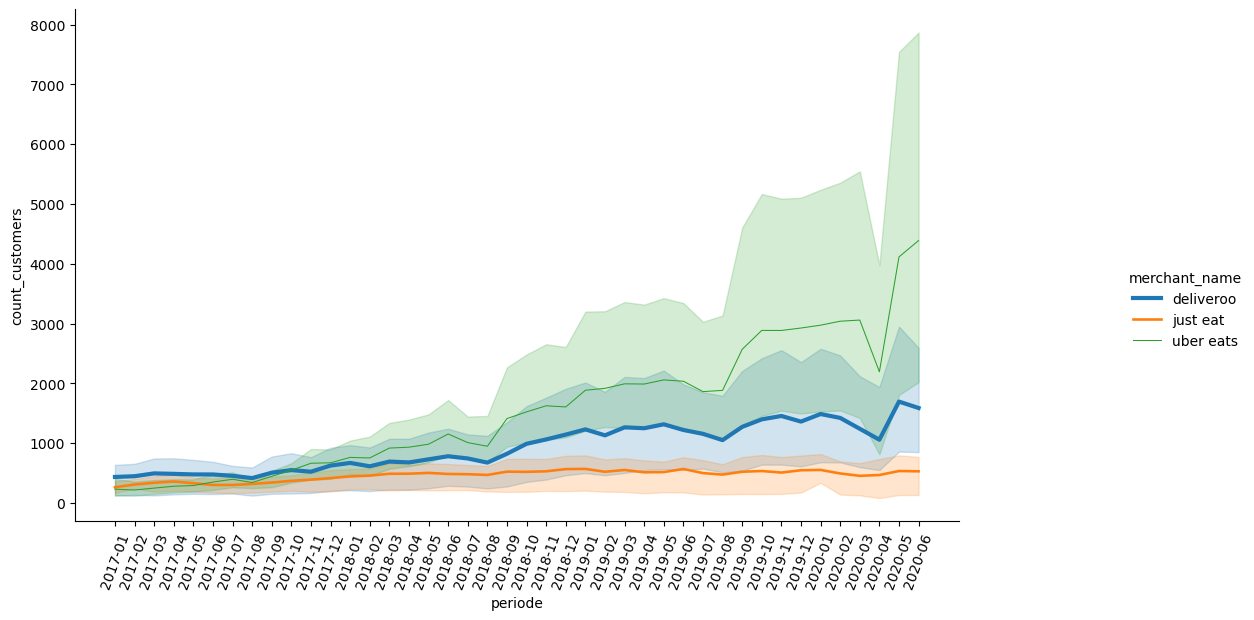

In [433]:
#Nb de clients par date et pour chaque provider
plt.figure(figsize=(10,8))
sns.relplot(data=customers, x='periode', y='count_customers', kind='line', hue='merchant_name',size='merchant_name')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.show()

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

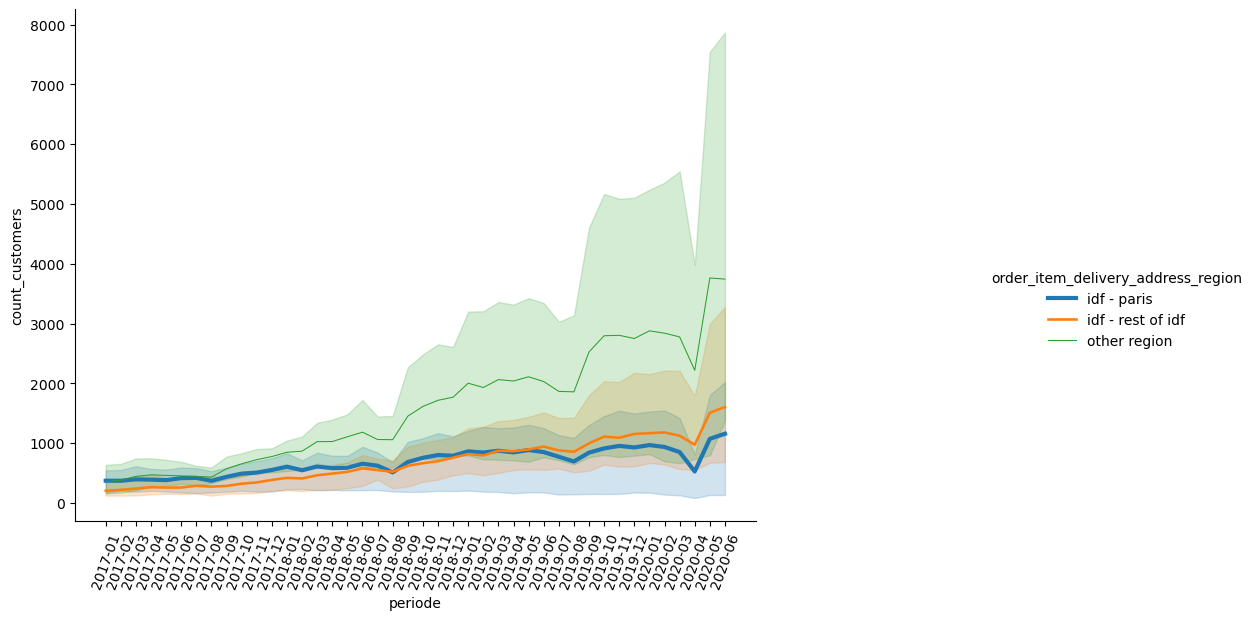

In [434]:
#Nb de clients par date et pour chaque region
plt.figure(figsize=(10,8))
sns.relplot(data=customers, x='periode', y='count_customers', kind='line', hue='order_item_delivery_address_region',size='order_item_delivery_address_region')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.show()

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1000x800 with 0 Axes>

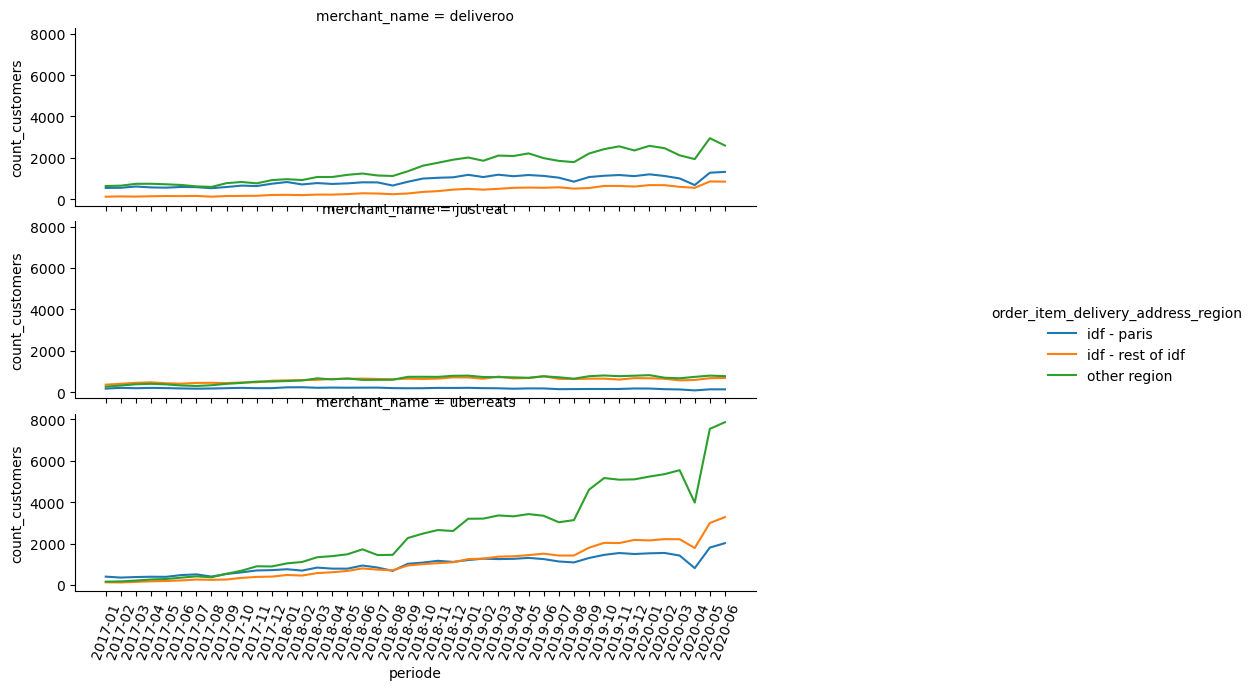

In [435]:
#Nb de clients par date et pour chaque region pour chaque provider
plt.figure(figsize=(10,8))
sns.relplot(data=customers, x='periode', y='count_customers', kind='line', hue='order_item_delivery_address_region',row='merchant_name')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.show()

In [436]:
#lecture de la table products
products = pd.read_csv(r"C:\Users\nadeg\OneDrive\Documents\Databird\Python\Projet\df_foxbolt\df_synthesized-products-extract_foxbolt.csv")
products

,f0_,id_order,product_name,product_description,merchant_name
0,2017-01-01,AVkmcB3KFSf772cTh6V2M9yGwuQ=,toast goody woody,NaN,deliveroo
1,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,soupe miso,sauce soja,deliveroo
2,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salmon lovers,"sauce soja sucree, baguettes, sauce soja sucre...",deliveroo
3,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,super mix,any three skewers with lamb & chicken doner se...,deliveroo
4,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salade de choux,NaN,deliveroo
...,...,...,...,...,...
1711611,2020-06-30,/7xBQ0v3sf7rNfCQfhezNVgKLgM=,menu le saint nicolas burger,NaN,uber eats
1711612,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,NaN,uber eats
1711613,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,NaN,uber eats
1711614,2020-06-30,//FH2PpgKmXmDNP1vRO4E3a3y0Y=,bouchees camembert x6,NaN,deliveroo


In [437]:
#vérification des types des variables de la table products
products.dtypes

f0_                    object
id_order               object
product_name           object
product_description    object
merchant_name          object
dtype: object

In [438]:
#information de la table products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711616 entries, 0 to 1711615
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   f0_                  object
 1   id_order             object
 2   product_name         object
 3   product_description  object
 4   merchant_name        object
dtypes: object(5)
memory usage: 65.3+ MB


In [439]:
#verif donnée merchant_name dans la table products
products['merchant_name'].value_counts()

merchant_name
uber eats    1021208
deliveroo     586491
just eat      103917
Name: count, dtype: int64

In [440]:
#verif donnée product_name dans la table products
products['product_name'].value_counts()

product_name
big mac                                                     30713
cheeseburger                                                18425
4 chicken mcnuggets                                         15301
croque mcdo                                                 15263
9 chicken mcnuggets                                         14331
                                                            ...  
tartare de boeuf du saint regis (170gr de boeuf), frites        1
aloe vera mangue 50 cl                                          1
jus de fruits : eau de coco 25 cl                               1
giulia crevettes rose                                           1
agneau chilly                                                   1
Name: count, Length: 160427, dtype: int64

In [441]:
#check presence nan
products.isna().sum()

f0_                          0
id_order                     0
product_name            104318
product_description    1010013
merchant_name                0
dtype: int64

In [442]:
#renommer colonne date + conversion en datetime
products = products.rename(columns = {'f0_' : 'order_date'})
products['order_date']=pd.to_datetime(products['order_date'])

In [443]:
#check des NaN du nom de produit et de leur répartition par date
nanprod=products[products['product_name'].isna()]
nanprod['product_name'].isna().groupby(nanprod['order_date']).sum()

order_date
2017-01-01      4
2017-01-02      5
2017-01-03     11
2017-01-04     15
2017-01-05     15
             ... 
2020-06-26     99
2020-06-27    123
2020-06-28    104
2020-06-29    125
2020-06-30     74
Name: product_name, Length: 1277, dtype: int64

In [444]:
#verif donnée product_description dans la table products
products['product_description'].value_counts()

product_description
extra fromage                                                        33380
als double burger                                                    18410
maionese                                                             15301
maionese, maionese                                                   14331
extra queso                                                          13324
                                                                     ...  
lait de soja                                                             1
le lot de 3 - 600 g                                                      1
pas de capresmerci !                                                     1
three large italian-style meatballs in chianti-braised meat sauce        1
perle de tapioca ; boba peche                                            1
Name: count, Length: 9770, dtype: int64

In [445]:
#création d'une copie de la table products
product2 = products

In [446]:
#drop colonne product_description difficilement analysable
product2 = product2.drop('product_description', axis=1)

In [447]:
#drop des lignes où product_name=NaN
product2 = product2.dropna(subset=['product_name'])

In [448]:
#création de la periode pour les cohortes
product2['periode']=product2['order_date'].dt.to_period('M')
product2=product2.reset_index()

In [449]:
# check étendue des dates dans la table products
minp=product2['order_date'].min()
maxp=product2['order_date'].max()
print(minp, maxp)

2017-01-01 00:00:00 2020-06-30 00:00:00


In [450]:
#clean des colonnes
product2=product2.drop('index', axis=1)

In [451]:
product2

,order_date,id_order,product_name,merchant_name,periode
0,2017-01-01,AVkmcB3KFSf772cTh6V2M9yGwuQ=,toast goody woody,deliveroo,2017-01
1,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,soupe miso,deliveroo,2017-01
2,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salmon lovers,deliveroo,2017-01
3,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,super mix,deliveroo,2017-01
4,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salade de choux,deliveroo,2017-01
...,...,...,...,...,...
1607293,2020-06-30,/7xBQ0v3sf7rNfCQfhezNVgKLgM=,menu le saint nicolas burger,uber eats,2020-06
1607294,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,uber eats,2020-06
1607295,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,uber eats,2020-06
1607296,2020-06-30,//FH2PpgKmXmDNP1vRO4E3a3y0Y=,bouchees camembert x6,deliveroo,2020-06


In [452]:
#nombre de commande différentes par plateforme
product2.groupby('merchant_name')['id_order'].count()


merchant_name
deliveroo     586268
uber eats    1021030
Name: id_order, dtype: int64

In [453]:
#nb moyen de produits commandés par commande
product2.groupby('id_order')['product_name'].count().mean()

2.2837425404944587

In [454]:
#nb moyen de produits commandés par commande par vendeurs
meanprod=product2.groupby(['merchant_name','id_order'])['product_name'].count().reset_index()
meanprod.groupby('merchant_name')['product_name'].mean()

merchant_name
deliveroo    2.246547
uber eats    2.305662
Name: product_name, dtype: float64

In [455]:
#Top 10 des produits les + vendus
top10produit=product2['product_name'].value_counts().head(10)
top10produit

product_name
big mac                30713
cheeseburger           18425
4 chicken mcnuggets    15301
croque mcdo            15263
9 chicken mcnuggets    14331
cbo                    13324
double cheese          12430
p'tit wrap ranch       11346
triple cheeseburger    10808
6 chicken mcnuggets     9946
Name: count, dtype: int64

In [456]:
#Top 10 des produits les + vendus par deliveroo
top10produitdel=product2[product2['merchant_name']=='deliveroo']
top10produitdel=top10produitdel['product_name'].value_counts().head(10)
top10produitdel

product_name
cheeseburger                    4075
le bartholome                   3564
frites                          2756
menu double steakhouse          2566
coca-cola                       1887
menu double cheese bacon xxl    1879
menu double whopper cheese      1849
kebab                           1804
bacon cheeseburger              1774
regina                          1728
Name: count, dtype: int64

In [457]:
#Top 10 des produits les + vendus par Uber eats
top10produituber=product2[product2['merchant_name']=='uber eats']
top10produituber=top10produituber['product_name'].value_counts().head(10)
top10produituber

product_name
big mac                30181
4 chicken mcnuggets    15153
croque mcdo            15106
cheeseburger           14350
9 chicken mcnuggets    14087
cbo                    13117
double cheese          12077
p'tit wrap ranch       11284
triple cheeseburger    10754
6 chicken mcnuggets     9795
Name: count, dtype: int64

In [458]:
#Top 10 des produits les + vendus 1er trimestre de la periode
top10produitdebut=product2.query("order_date<='2017-03-31'")
top10produitdebut=top10produitdebut['product_name'].value_counts().head(10)
top10produitdebut

product_name
le bartholome                     293
little formule : le bartholome    202
frites maison                     165
coca-cola                         134
regina                            106
le big fernand                    105
frites                            102
cheeseburger                      102
cheese burger                      86
tiramisu                           86
Name: count, dtype: int64

In [459]:
#Top 10 des produits les + vendus dernier trimestre de la periode
top10produitfin=product2.query("order_date<='2020-04-01'")
top10produitfin=top10produitfin['product_name'].value_counts().head(10)
top10produitfin

product_name
big mac                25475
cheeseburger           15067
croque mcdo            13171
4 chicken mcnuggets    12974
9 chicken mcnuggets    11556
cbo                    11056
p'tit wrap ranch       10688
double cheese           9981
triple cheeseburger     9137
6 chicken mcnuggets     8297
Name: count, dtype: int64

In [460]:
transactions = pd.read_csv(r"C:\Users\nadeg\OneDrive\Documents\Databird\Python\Projet\df_foxbolt\df_synthesized-transactions-extract_foxbolt.csv")
transactions

,row_nb,synthetic_gender,synthetic_age_generation,is_loyalty_deliveroo,merchant_name,order_date,order_time,order_total_paid,order_currency,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo
0,1,2.0,Gen. Y - [1980-1994],NaN,deliveroo,2020-01-15,12:00:00,10.3,eur,NaN,0.0,0.0,0.0,0.0,thai in box,asian - thai,ile de france,hauts de seine,sevres,0,0,1
1,2,1.0,Gen. Z - [1995-2010],NaN,uber eats,2019-01-24,19:00:00,7.6,eur,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1
2,3,1.0,Gen. Z - [1995-2010],NaN,uber eats,2020-02-05,12:00:00,10.6,eur,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0
3,4,1.0,Gen. Y - [1980-1994],NaN,just eat,2019-01-11,21:00:00,0.0,eur,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,val d oise,cergy,0,1,0
4,5,NaN,Gen. Z - [1995-2010],NaN,deliveroo,2019-12-15,20:00:00,25.3,eur,NaN,2.5,0.0,2.5,4.0,o'tacos,latin american - mexican,ile de france,seine saint denis,aubervilliers,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807671,807672,2.0,Gen. Z - [1995-2010],NaN,just eat,2019-04-10,20:00:00,0.6,eur,NaN,0.0,0.0,NaN,0.0,NaN,NaN,provence alpes cote d azur,bouches du rhone,marseille,0,1,0
807672,807673,2.0,Gen. Z - [1995-2010],NaN,uber eats,2020-06-01,18:00:00,16.3,eur,paypal,0.5,1.4,1.8,0.0,planet sushi,asian - japanese - sushi,centre val de loire,loiret,orleans,1,0,0
807673,807674,1.0,NaN,NaN,uber eats,2018-12-02,19:00:00,15.9,eur,paypal,3.9,0.0,3.9,0.0,o'tacos,latin american - mexican,occitanie,haute garonne,toulouse,1,0,0
807674,807675,2.0,Gen. Z - [1995-2010],NaN,uber eats,2020-03-14,17:00:00,30.0,eur,payment card - visa,3.5,0.0,5.3,0.0,mcdonald's,north american - burger,hauts de france,nord,valenciennes,1,0,0


In [461]:
#copie de la table transactions
transactions2 = transactions

In [462]:
#verification des types de données de la table transactions2
transactions2.dtypes

row_nb                                     int64
synthetic_gender                         float64
synthetic_age_generation                  object
is_loyalty_deliveroo                     float64
merchant_name                             object
order_date                                object
order_time                                object
order_total_paid                         float64
order_currency                            object
payment_method_name                       object
order_delivery_fee                       float64
order_processing_fee                     float64
order_total_fees                         float64
order_total_promo                        float64
seller_name                               object
seller_category_name                      object
order_item_delivery_address_region        object
order_item_delivery_address_subregion     object
order_item_delivery_address_city          object
is_customer_month_ubereats                 int64
is_customer_month_ju

In [463]:
#verification variable merchant_name de la table transactions
transactions2['merchant_name'].value_counts()

merchant_name
uber eats    442797
deliveroo    260964
just eat     103915
Name: count, dtype: int64

In [464]:
#verification variable is_loyalty_deliveroo de la table transactions
transactions2['is_loyalty_deliveroo'].value_counts()

is_loyalty_deliveroo
0.0    20308
1.0     8937
Name: count, dtype: int64

In [465]:
#verification variable order_currency de la table transactions -> que des euros
transactions2['order_currency'].value_counts()

order_currency
eur    807676
Name: count, dtype: int64

In [466]:
#check nombre de NaN dans la table transactions
transactions2.isna().sum()

row_nb                                        0
synthetic_gender                          30386
synthetic_age_generation                  49900
is_loyalty_deliveroo                     778431
merchant_name                                 0
order_date                                    0
order_time                                    0
order_total_paid                          30207
order_currency                                0
payment_method_name                      365297
order_delivery_fee                          199
order_processing_fee                          0
order_total_fees                         103915
order_total_promo                             0
seller_name                               74717
seller_category_name                      79814
order_item_delivery_address_region         4951
order_item_delivery_address_subregion      4951
order_item_delivery_address_city           4951
is_customer_month_ubereats                    0
is_customer_month_justeat               

In [467]:
#drop colonne is loyalty deliveroo et order currency, passage order_date en datetime + isolation de la periode et de l'heure
transactions2 = transactions2.drop('is_loyalty_deliveroo', axis=1)
transactions2 = transactions2.drop('order_currency', axis=1)
transactions2['order_date']=pd.to_datetime(transactions2['order_date'])
transactions2['periode']=transactions2['order_date'].dt.to_period('M')
transactions2['order_time']=pd.to_datetime(transactions2['order_time']).dt.hour

C:\Users\nadeg\AppData\Local\Temp\ipykernel_50616\124182565.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transactions2['order_time']=pd.to_datetime(transactions2['order_time']).dt.hour


In [468]:
#verif etendue des dates dans la table transactions
mint=transactions2['order_date'].min()
maxt=transactions2['order_date'].max()
print(mint,maxt)

2017-01-01 00:00:00 2020-06-30 00:00:00


In [469]:
#check variable synthetic_gender
transactions2['synthetic_gender'].value_counts()

synthetic_gender
1.0    548952
2.0    228338
Name: count, dtype: int64

In [470]:
#creation d'une catégorie 3 dans les genders pour ceux qui ne sont non renseignés
transactions2['synthetic_gender']=transactions2['synthetic_gender'].fillna(3)
#renommer colonne gender
transactions2 = transactions2.rename(columns = {'synthetic_gender' : 'gender'})

In [471]:
#check variable gender dans la table transactions
transactions2['gender'].value_counts()

gender
1.0    548952
2.0    228338
3.0     30386
Name: count, dtype: int64

In [472]:
#création d'une nouvelle colonne pour le sexe
transactions2['sex']=transactions2['gender']

In [473]:
#dico pour mettre un label aux valeurs de la variable "sex"
dic = {1:'male', 2:'female',3:'unknown'}

In [474]:
#application new dico pour la variable sex pour des avoir données catégorielles
transactions2['sex']=transactions2['sex'].replace(dic)

In [475]:
transactions2

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex
0,1,2.0,Gen. Y - [1980-1994],deliveroo,2020-01-15,12,10.3,NaN,0.0,0.0,0.0,0.0,thai in box,asian - thai,ile de france,hauts de seine,sevres,0,0,1,2020-01,female
1,2,1.0,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male
2,3,1.0,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male
3,4,1.0,Gen. Y - [1980-1994],just eat,2019-01-11,21,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,val d oise,cergy,0,1,0,2019-01,male
4,5,3.0,Gen. Z - [1995-2010],deliveroo,2019-12-15,20,25.3,NaN,2.5,0.0,2.5,4.0,o'tacos,latin american - mexican,ile de france,seine saint denis,aubervilliers,0,0,1,2019-12,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807671,807672,2.0,Gen. Z - [1995-2010],just eat,2019-04-10,20,0.6,NaN,0.0,0.0,NaN,0.0,NaN,NaN,provence alpes cote d azur,bouches du rhone,marseille,0,1,0,2019-04,female
807672,807673,2.0,Gen. Z - [1995-2010],uber eats,2020-06-01,18,16.3,paypal,0.5,1.4,1.8,0.0,planet sushi,asian - japanese - sushi,centre val de loire,loiret,orleans,1,0,0,2020-06,female
807673,807674,1.0,NaN,uber eats,2018-12-02,19,15.9,paypal,3.9,0.0,3.9,0.0,o'tacos,latin american - mexican,occitanie,haute garonne,toulouse,1,0,0,2018-12,male
807674,807675,2.0,Gen. Z - [1995-2010],uber eats,2020-03-14,17,30.0,payment card - visa,3.5,0.0,5.3,0.0,mcdonald's,north american - burger,hauts de france,nord,valenciennes,1,0,0,2020-03,female


In [476]:
#passage variable gender en integer
transactions2['gender']=transactions2['gender'].astype('int64')

In [477]:
# check variable age dans la table transactions
transactions2['synthetic_age_generation'].value_counts()

synthetic_age_generation
Gen. Y - [1980-1994]        393549
Gen. Z - [1995-2010]        337489
Gen. X - [1960-1979]         25046
Boomer - [1940-1959]          1392
Pre boomer - [1920-1939]       300
Name: count, dtype: int64

In [478]:
# verif variable seller_name dans la table transactions
transactions2['seller_name'].value_counts()

seller_name
mcdonald's                      101102
kfc                              21450
o'tacos                          20833
burger king                      18171
subway                           15847
                                 ...  
mezze & narguile libanais            1
la risotteria                        1
saladecomposee.fr - rangueil         1
ponto do acai tropical               1
le surcouf                           1
Name: count, Length: 24481, dtype: int64

In [479]:
#check variable methode de paiement dans la table transactions
transactions2['payment_method_name'].value_counts()

payment_method_name
payment card - visa                                       224590
payment card - mastercard                                 120224
paypal                                                     77855
applepay                                                   10701
payment card - american express                             5752
lunchr_card_icon; visa                                       443
unavailable_asset                                            354
edenred                                                      302
lunchr_card_icon; paypal                                     277
visa; imgjoulet1                                             270
lunchr_card_icon; mastercard                                 238
payment card                                                 216
mastercard; imgjoulet1                                       165
paypal; imgjoulet1                                           165
visa; imgjoulet2                                             155
maste

In [480]:
#check variable region dans la table transactions
transactions2['order_item_delivery_address_region'].value_counts()

order_item_delivery_address_region
ile de france                 393373
auvergne rhone alpes           93349
occitanie                      60142
nouvelle aquitaine             51425
provence alpes cote d azur     45074
hauts de france                40570
grand est                      35507
pays de la loire               29699
bretagne                       18083
normandie                      15287
centre val de loire            11780
bourgogne franche comte         8238
reunion                          132
corse                             60
greater london                     4
cataluna                           1
canarias                           1
Name: count, dtype: int64

In [481]:
#check variable subregion dans la table transactions
transactions2['order_item_delivery_address_subregion'].value_counts()

order_item_delivery_address_subregion
paris                      204474
hauts de seine              70065
rhone                       62198
gironde                     38443
haute garonne               37078
                            ...  
alpes de haute provence         8
ariege                          7
london                          4
barcelona                       1
las palmas                      1
Name: count, Length: 97, dtype: int64

In [482]:
#check variable city dans la table transactions
transactions2['order_item_delivery_address_city'].value_counts()

order_item_delivery_address_city
paris             204474
lyon               42833
toulouse           33356
bordeaux           27658
lille              21418
                   ...  
isle                   1
grand couronne         1
ste soulle             1
quenza                 1
le soler               1
Name: count, Length: 1455, dtype: int64

In [483]:
#selection des données de just eats dans la table transactions
jeat = transactions2[transactions2['merchant_name']== 'just eat']
jeat

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex
3,4,1,Gen. Y - [1980-1994],just eat,2019-01-11,21,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,val d oise,cergy,0,1,0,2019-01,male
9,10,1,Gen. Y - [1980-1994],just eat,2017-03-12,18,0.6,NaN,0.0,0.0,NaN,0.0,NaN,NaN,nouvelle aquitaine,haute vienne,limoges,0,1,0,2017-03,male
19,20,2,Gen. Y - [1980-1994],just eat,2019-12-03,22,NaN,NaN,0.0,0.0,NaN,0.0,sushi sake,asian - japanese - sushi,ile de france,paris,paris,0,1,0,2019-12,female
24,25,2,Gen. Z - [1995-2010],just eat,2019-05-04,20,0.4,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,val d oise,argenteuil,0,1,0,2019-05,female
27,28,1,Gen. Z - [1995-2010],just eat,2020-04-12,13,NaN,NaN,0.0,0.0,NaN,0.0,smoky grill burger,north american - burger,NaN,NaN,NaN,0,1,0,2020-04,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807619,807620,3,Gen. Z - [1995-2010],just eat,2019-10-17,22,NaN,NaN,0.0,0.0,NaN,0.0,kebab d'or,middle eastern - kebab,auvergne rhone alpes,loire,st etienne,0,1,0,2019-10,unknown
807628,807629,1,Gen. Z - [1995-2010],just eat,2018-04-25,14,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,seine et marne,coulommiers,0,1,0,2018-04,male
807654,807655,1,Gen. X - [1960-1979],just eat,2017-01-26,20,0.6,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,hauts de seine,asnieres sur seine,0,1,0,2017-01,male
807663,807664,1,Gen. Y - [1980-1994],just eat,2019-12-16,23,NaN,NaN,0.0,0.0,NaN,0.0,pizza lyonnaise,european - italian - pizza,auvergne rhone alpes,rhone,lyon,0,1,0,2019-12,male


In [484]:
#check des NaN dans la table transaction pour just eat
jeat.isna().sum()

row_nb                                        0
gender                                        0
synthetic_age_generation                   7229
merchant_name                                 0
order_date                                    0
order_time                                    0
order_total_paid                          30207
payment_method_name                      103912
order_delivery_fee                          189
order_processing_fee                          0
order_total_fees                         103915
order_total_promo                             0
seller_name                               74717
seller_category_name                      74951
order_item_delivery_address_region         1274
order_item_delivery_address_subregion      1274
order_item_delivery_address_city           1274
is_customer_month_ubereats                    0
is_customer_month_justeat                     0
is_customer_month_deliveroo                   0
periode                                 

In [485]:
#check des montants de commande dans la table transaction pour just eat
jeat['order_total_paid'].describe()

count    73708.000000
mean         0.249640
std          0.323887
min          0.000000
25%          0.000000
50%          0.000000
75%          0.500000
max          1.000000
Name: order_total_paid, dtype: float64

In [486]:
# verif si Nan pour le montant de la commande pour deliveroo -> pas de montant de commande manquant pour deliveroo
nansomme=transactions2[transactions2['order_total_paid'].isna()]
nansommedel=nansomme[nansomme['merchant_name']=='deliveroo']
nansommedel

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex


In [487]:
# verif si Nan pour le montant de la commande pour uber eats -> pas de montant de commande manquant pour uber eats
nansomme=transactions2[transactions2['order_total_paid'].isna()]
nansommeuber=nansomme[nansomme['merchant_name']=='uber eats']
nansommeuber

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex


In [488]:
# verif si Nan pour le montant de la commande pour just eat
nansomme=transactions2[transactions2['order_total_paid'].isna()]
nansommejust=nansomme[nansomme['merchant_name']=='just eat']
nansommejust

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex
19,20,2,Gen. Y - [1980-1994],just eat,2019-12-03,22,NaN,NaN,0.0,0.0,NaN,0.0,sushi sake,asian - japanese - sushi,ile de france,paris,paris,0,1,0,2019-12,female
27,28,1,Gen. Z - [1995-2010],just eat,2020-04-12,13,NaN,NaN,0.0,0.0,NaN,0.0,smoky grill burger,north american - burger,NaN,NaN,NaN,0,1,0,2020-04,male
33,34,2,Gen. Y - [1980-1994],just eat,2020-01-29,14,NaN,NaN,0.0,0.0,NaN,0.0,funky burger,north american - burger,nouvelle aquitaine,gironde,bordeaux,0,1,0,2020-01,female
44,45,1,Gen. Z - [1995-2010],just eat,2020-03-31,15,NaN,NaN,0.0,0.0,NaN,0.0,casa di roma,european - italian - pizza,grand est,vosges,epinal,0,1,0,2020-03,male
74,75,1,Gen. Y - [1980-1994],just eat,2019-07-14,14,NaN,NaN,0.0,0.0,NaN,0.0,spizza 34 sud,european - italian - pizza,occitanie,herault,montpellier,0,1,0,2019-07,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807572,807573,1,Gen. Z - [1995-2010],just eat,2020-01-27,23,NaN,NaN,0.0,0.0,NaN,0.0,l'orient express,middle eastern - others,ile de france,yvelines,elancourt,0,1,0,2020-01,male
807592,807593,1,Gen. Y - [1980-1994],just eat,2019-07-28,11,NaN,NaN,0.0,0.0,NaN,0.0,tacos avenue,latin american - mexican,provence alpes cote d azur,vaucluse,avignon,0,1,0,2019-07,male
807607,807608,1,Gen. Y - [1980-1994],just eat,2020-02-19,9,NaN,NaN,0.0,0.0,NaN,0.0,boulangerie bensmaini,european - french,nouvelle aquitaine,gironde,bordeaux,1,1,0,2020-02,male
807619,807620,3,Gen. Z - [1995-2010],just eat,2019-10-17,22,NaN,NaN,0.0,0.0,NaN,0.0,kebab d'or,middle eastern - kebab,auvergne rhone alpes,loire,st etienne,0,1,0,2019-10,unknown


In [489]:
# verif si Nan pour le montant total des fees pour deliveroo -> aucun
nanfees=transactions2[transactions2['order_total_fees'].isna()]
nanfeesdel=nanfees[nanfees['merchant_name']=='deliveroo']
nanfeesdel

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex


In [490]:
# verif si Nan pour le montant total des fees pour uber eats -> aucun
nanfees=transactions2[transactions2['order_total_fees'].isna()]
nanfeesuber=nanfees[nanfees['merchant_name']=='uber eats']
nanfeesuber

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex


In [491]:
# verif si Nan pour le montant total des fees pour just eat
nanfees=transactions2[transactions2['order_total_fees'].isna()]
nanfeesjust=nanfees[nanfees['merchant_name']=='just eat']
nanfeesjust

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex
3,4,1,Gen. Y - [1980-1994],just eat,2019-01-11,21,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,val d oise,cergy,0,1,0,2019-01,male
9,10,1,Gen. Y - [1980-1994],just eat,2017-03-12,18,0.6,NaN,0.0,0.0,NaN,0.0,NaN,NaN,nouvelle aquitaine,haute vienne,limoges,0,1,0,2017-03,male
19,20,2,Gen. Y - [1980-1994],just eat,2019-12-03,22,NaN,NaN,0.0,0.0,NaN,0.0,sushi sake,asian - japanese - sushi,ile de france,paris,paris,0,1,0,2019-12,female
24,25,2,Gen. Z - [1995-2010],just eat,2019-05-04,20,0.4,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,val d oise,argenteuil,0,1,0,2019-05,female
27,28,1,Gen. Z - [1995-2010],just eat,2020-04-12,13,NaN,NaN,0.0,0.0,NaN,0.0,smoky grill burger,north american - burger,NaN,NaN,NaN,0,1,0,2020-04,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807619,807620,3,Gen. Z - [1995-2010],just eat,2019-10-17,22,NaN,NaN,0.0,0.0,NaN,0.0,kebab d'or,middle eastern - kebab,auvergne rhone alpes,loire,st etienne,0,1,0,2019-10,unknown
807628,807629,1,Gen. Z - [1995-2010],just eat,2018-04-25,14,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,seine et marne,coulommiers,0,1,0,2018-04,male
807654,807655,1,Gen. X - [1960-1979],just eat,2017-01-26,20,0.6,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,hauts de seine,asnieres sur seine,0,1,0,2017-01,male
807663,807664,1,Gen. Y - [1980-1994],just eat,2019-12-16,23,NaN,NaN,0.0,0.0,NaN,0.0,pizza lyonnaise,european - italian - pizza,auvergne rhone alpes,rhone,lyon,0,1,0,2019-12,male


In [492]:
# verif si Nan pour le montant des frais de livraison pour deliveroo
nandel=transactions2[transactions2['order_delivery_fee'].isna()]
nandeldel=nandel[nandel['merchant_name']=='deliveroo']
nandeldel

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex
25428,25429,1,Gen. Y - [1980-1994],deliveroo,2020-06-13,12,63.8,NaN,NaN,0.0,0.0,0.0,street bangkok : rice&noodles,asian - thai,ile de france,hauts de seine,levallois perret,0,0,1,2020-06,male
29772,29773,2,Gen. Z - [1995-2010],deliveroo,2020-05-28,20,19.8,NaN,NaN,0.0,0.0,4.9,uno,european - others,ile de france,paris,paris,0,0,1,2020-05,female
74359,74360,2,Gen. Y - [1980-1994],deliveroo,2020-06-20,14,15.4,NaN,NaN,0.0,0.0,0.0,yume sushi,asian - japanese - sushi,grand est,bas rhin,strasbourg,0,0,1,2020-06,female
110706,110707,2,Gen. Y - [1980-1994],deliveroo,2020-04-29,12,33.5,NaN,NaN,0.0,0.0,5.8,nakagawa,asian - japanese - sushi,ile de france,paris,paris,0,0,1,2020-04,female
127786,127787,1,Gen. Y - [1980-1994],deliveroo,2020-04-25,18,14.5,NaN,NaN,0.0,0.0,0.0,pizza chic,european - italian - pizza,ile de france,paris,paris,0,0,1,2020-04,male
148897,148898,1,Gen. Z - [1995-2010],deliveroo,2020-06-17,12,22.6,NaN,NaN,0.0,0.0,7.5,cosi,european - italian - others,ile de france,paris,paris,0,0,1,2020-06,male
374743,374744,2,Gen. Z - [1995-2010],deliveroo,2020-05-12,13,44.6,NaN,NaN,0.0,0.0,0.0,o wasabi,asian - japanese - others,auvergne rhone alpes,isere,grenoble,0,1,1,2020-05,female
484383,484384,1,Gen. Y - [1980-1994],deliveroo,2020-04-25,21,15.0,NaN,NaN,0.0,0.0,0.0,pizza chic,european - italian - pizza,ile de france,paris,paris,0,0,1,2020-04,male
580961,580962,2,Gen. Z - [1995-2010],deliveroo,2020-05-28,18,17.9,NaN,NaN,0.0,0.0,4.6,uno,european - others,ile de france,paris,paris,0,0,1,2020-05,female
685826,685827,1,NaN,deliveroo,2020-05-26,21,17.9,NaN,NaN,0.0,0.0,0.0,le bon burger !,north american - burger,ile de france,hauts de seine,nanterre,0,0,1,2020-05,male


In [493]:
# verif si Nan pour le montant des frais de livraison pour uber eats -> aucun
nandeluber=nandel[nandel['merchant_name']=='uber eats']
nandeluber

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex


In [494]:
# verif si Nan pour le montant des frais de livraison pour just eat
nandeljust=nandel[nandel['merchant_name']=='just eat']
nandeljust

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex
582,583,1,Gen. Y - [1980-1994],just eat,2018-06-27,17,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,ile de france,paris,paris,0,1,0,2018-06,male
20396,20397,2,Gen. Z - [1995-2010],just eat,2018-03-27,19,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,ile de france,val de marne,vitry sur seine,0,1,0,2018-03,female
21141,21142,1,Gen. Y - [1980-1994],just eat,2017-11-10,14,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,ile de france,hauts de seine,boulogne billancourt,0,1,0,2017-11,male
27905,27906,1,Gen. Y - [1980-1994],just eat,2018-01-22,18,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,provence alpes cote d azur,var,draguignan,0,1,0,2018-01,male
31834,31835,1,Gen. Y - [1980-1994],just eat,2018-06-27,12,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,ile de france,paris,paris,0,1,0,2018-06,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782414,782415,1,Gen. Z - [1995-2010],just eat,2018-08-21,19,0.3,NaN,NaN,0.0,NaN,0.0,NaN,NaN,ile de france,seine et marne,dammarie les lys,0,1,0,2018-08,male
783142,783143,1,Gen. X - [1960-1979],just eat,2017-10-23,20,0.7,NaN,NaN,0.0,NaN,0.0,NaN,NaN,ile de france,seine saint denis,st denis,0,1,0,2017-10,male
789833,789834,2,Gen. Z - [1995-2010],just eat,2019-04-22,20,0.4,NaN,NaN,0.0,NaN,0.0,NaN,NaN,ile de france,essonne,chilly mazarin,0,1,0,2019-04,female
797687,797688,3,Gen. Z - [1995-2010],just eat,2018-03-10,21,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,ile de france,val de marne,villejuif,0,1,0,2018-03,unknown


In [495]:
#renommer colonne synthetic_age_generation en age
transactions2 = transactions2.rename(columns = {'synthetic_age_generation' : 'age'})
#modif des NaN en Unknown pour age, payment method, seller_name, seller_category_name, order_item_delivery_address_region, order_item_delivery_address_subregion, order_item_delivery_address_city
transactions2['age']=transactions2['age'].fillna('Unknown')
transactions2['payment_method_name']=transactions2['payment_method_name'].fillna('Unknown')
transactions2[['seller_name','seller_category_name','order_item_delivery_address_region','order_item_delivery_address_subregion',
               'order_item_delivery_address_city']]=transactions2[['seller_name','seller_category_name','order_item_delivery_address_region',
                'order_item_delivery_address_subregion','order_item_delivery_address_city']].fillna('Unknown')

In [496]:
# dico pour les seller category name avec nouvelle colonne 'category name' pour faciliter l'exploitation de la donnée
dic = {'north american - burger':'North american','european - italian - pizza':'European','latin american - mexican':'Latin american','asian - japanese - sushi':'Asian',
       'north american - chicken':'North american','north american - sandwich':'North american', 'european - french':'European','asian - thai':'Asian','european - italian - others':'European',
       'asian - indian':'Asian','north american - others':'North american','north american - hawaiian':'North american','asian - japanese - others':'Asian', 'middle eastern - kebab':'Middle eastern',
       'asian - vietnamese':'Asian', 'asian - others':'Asian','asian - chinese':'Asian','middle eastern - lebanese':'Middle eastern','european - salad':'European','north american - bbq':'North american',
       'european - others':'European','middle eastern - others':'Middle eastern','asian - korean':'Asian','european - italian - pasta':'European','latin american - others':'Latin american',
       'others':'Others','african':'African','north american - bagel':'North american','european - spanish':'European','european - british':'European', 'latin american - peruvian':'Latin american'}
transactions2['Category_name']=transactions2['seller_category_name']
transactions2['Category_name']=transactions2['Category_name'].replace(dic)

In [497]:
# dico pour les seller category name avec nouvelle colonne 'sub category name' pour les types de cuisine
dico = {'north american - burger':'Burger','european - italian - pizza':'Italian','latin american - mexican':'Mexican',
        'asian - japanese - sushi':'Japanese','north american - chicken':'Chicken','north american - sandwich':'Sandwich', 
        'european - french':'French','asian - thai':'Thai','european - italian - others':'Italian','asian - indian':'Indian',
        'north american - others':'North american - Others','north american - hawaiian':'Hawaiian','asian - japanese - others':'Japanese', 
        'middle eastern - kebab':'Kebab','asian - vietnamese':'Vietnamese', 'asian - others':'Asian - Others','asian - chinese':'Chinese',
        'middle eastern - lebanese':'Lebanese','european - salad':'Salad','north american - bbq':'BBQ','european - others':'European - Others',
        'middle eastern - others':'Middle eastern - Others','asian - korean':'Korean','european - italian - pasta':'Italian',
        'latin american - others':'Latin american - Others','others':'Others','african':'African','north american - bagel':'Bagel',
        'european - spanish':'Spanish','european - british':'British', 'latin american - peruvian':'Peruvian'}
transactions2['Sub_category_name']=transactions2['seller_category_name']
transactions2['Sub_category_name']=transactions2['Sub_category_name'].replace(dico)

In [498]:
#definition dic_hours pour faire plage horaire
dic_hours = {(0, 1, 2, 3, 4, 5, 6): 'Night',(7, 8, 9, 10): 'Morning',(11, 12, 13, 14): 'Lunch',(15, 16, 17, 18): 'Afternoon',
             (19, 20, 21, 22, 23): 'Dinner'}
dic_hours

{(0, 1, 2, 3, 4, 5, 6): 'Night',
 (7, 8, 9, 10): 'Morning',
 (11, 12, 13, 14): 'Lunch',
 (15, 16, 17, 18): 'Afternoon',
 (19, 20, 21, 22, 23): 'Dinner'}

In [499]:
# fonction map_hour_to_period définie pour appliquer les plages horaires aux heures
def map_hour_to_period(hour):
    for hours, period in dic_hours.items():
        if hour in hours:
            return period
    return None

In [500]:
#Application de la fonction pour avoir des plages horaires
transactions2['hour_range'] = transactions2['order_time'].apply(map_hour_to_period)
transactions2['hour_range']

0             Lunch
1            Dinner
2             Lunch
3            Dinner
4            Dinner
            ...    
807671       Dinner
807672    Afternoon
807673       Dinner
807674    Afternoon
807675       Dinner
Name: hour_range, Length: 807676, dtype: object

In [501]:
#definition de la fonction promo pour avoir une variable facilement exploitable
def promo(x):
    if x == 0 :
      return 'no_promo'
    else :
        return 'promo applied'

In [502]:
#Application de la fonction promo dans la table transactions en créant une nouvelle variable promo_yes
transactions2['promo_yes']= transactions2['order_total_promo'].apply(promo)

In [503]:
#definition de la fonction region pour avoir la meme catégorie que dans la table customers
def region(x):
    list = ['seine et marne', 'val de marne','seine saint denis','val d oise','yvelines','hauts de seine','essonne']
    if x == 'paris' :
      return 'Ile de France - Paris'
    elif x in list :
        return 'Ile de France - rest of IDF'
    else :
        return 'Other region'

In [504]:
#Application de la fonction region dans la table transactions en créant une nouvelle variable subregion_short
transactions2['subregion_short']= transactions2['order_item_delivery_address_subregion'].apply(region)

In [505]:
#ajout variable jour de la semaine dans la table transactions2
transactions2['day_of_week']=transactions2['order_date'].dt.day_name()
transactions2['day_of_week']

0         Wednesday
1          Thursday
2         Wednesday
3            Friday
4            Sunday
            ...    
807671    Wednesday
807672       Monday
807673       Sunday
807674     Saturday
807675     Thursday
Name: day_of_week, Length: 807676, dtype: object

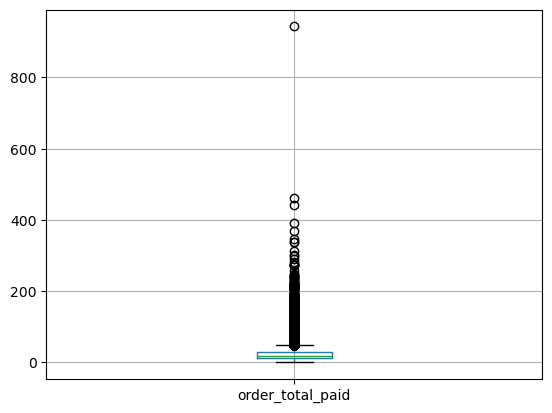

In [506]:
# check variable montant total de commande
transactions2['order_total_paid'].to_frame().boxplot()
plt.show()

In [507]:
#check montant total de commande à 0
total0=transactions2[transactions2['order_total_paid']==0]
#check nombre de commandes ou montant total de commande à 0 par plateforme et par order_total_promo
total0.groupby('merchant_name')['order_total_promo'].value_counts()

merchant_name  order_total_promo
deliveroo      0.0                  447
               12.0                  15
               15.0                  15
               14.5                  15
               11.0                  13
                                   ... 
uber eats      11.8                   1
               4.5                    1
               4.3                    1
               3.5                    1
               101.9                  1
Name: count, Length: 365, dtype: int64

In [508]:
#check montant total des commandes à 0
total0

,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,day_of_week
3,4,1,Gen. Y - [1980-1994],just eat,2019-01-11,21,0.0,Unknown,0.0,0.0,NaN,0.0,Unknown,Unknown,ile de france,val d oise,cergy,0,1,0,2019-01,male,Unknown,Unknown,Dinner,no_promo,Ile de France - rest of IDF,Friday
42,43,1,Gen. Z - [1995-2010],just eat,2017-07-10,14,0.0,Unknown,0.0,0.0,NaN,0.0,Unknown,Unknown,ile de france,seine et marne,bussy st georges,0,1,0,2017-07,male,Unknown,Unknown,Lunch,no_promo,Ile de France - rest of IDF,Monday
168,169,2,Gen. X - [1960-1979],just eat,2018-06-24,12,0.0,Unknown,0.0,0.0,NaN,0.0,Unknown,Unknown,bretagne,ille et vilaine,rennes,0,1,0,2018-06,female,Unknown,Unknown,Lunch,no_promo,Other region,Sunday
190,191,1,Gen. Z - [1995-2010],just eat,2018-06-29,21,0.0,Unknown,0.0,0.0,NaN,0.0,Unknown,Unknown,provence alpes cote d azur,alpes maritimes,le cannet,1,1,0,2018-06,male,Unknown,Unknown,Dinner,no_promo,Other region,Friday
254,255,2,Gen. Z - [1995-2010],just eat,2018-05-21,20,0.0,Unknown,0.0,0.0,NaN,0.0,Unknown,Unknown,occitanie,herault,montpellier,0,1,0,2018-05,female,Unknown,Unknown,Dinner,no_promo,Other region,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807547,807548,1,Gen. Y - [1980-1994],just eat,2017-07-16,22,0.0,Unknown,0.0,0.0,NaN,0.0,Unknown,Unknown,ile de france,seine saint denis,montreuil,1,1,0,2017-07,male,Unknown,Unknown,Dinner,no_promo,Ile de France - rest of IDF,Sunday
807565,807566,1,Gen. Y - [1980-1994],just eat,2019-05-20,0,0.0,Unknown,0.0,0.0,NaN,0.0,Unknown,Unknown,ile de france,paris,paris,0,1,1,2019-05,male,Unknown,Unknown,Night,no_promo,Ile de France - Paris,Monday
807569,807570,2,Gen. Y - [1980-1994],just eat,2017-11-20,19,0.0,Unknown,0.0,0.0,NaN,0.0,Unknown,Unknown,ile de france,hauts de seine,colombes,0,1,0,2017-11,female,Unknown,Unknown,Dinner,no_promo,Ile de France - rest of IDF,Monday
807576,807577,2,Gen. Y - [1980-1994],just eat,2018-09-14,20,0.0,Unknown,0.0,0.0,NaN,0.0,Unknown,Unknown,provence alpes cote d azur,alpes maritimes,cannes,1,1,0,2018-09,female,Unknown,Unknown,Dinner,no_promo,Other region,Friday


In [509]:
# verif presence des montants de commandes à 0 par plateforme
total0['merchant_name'].value_counts()

merchant_name
just eat     38720
deliveroo     1098
uber eats      354
Name: count, dtype: int64

In [510]:
# check montants de commande à 0 par plateforme et par date
total0.groupby(['periode','merchant_name'])['order_total_paid'].count()

periode  merchant_name
2017-01  deliveroo         11
         just eat         729
         uber eats          6
2017-02  deliveroo         12
         just eat         891
                         ... 
2020-04  uber eats         13
2020-05  deliveroo         55
         uber eats         28
2020-06  deliveroo         46
         uber eats         20
Name: order_total_paid, Length: 115, dtype: int64

In [511]:
#interpolation des delivery fees=nan pour deliveroo dans new variable order_delivery_fee_i pour ne pas écraser la variable de départ
transactionsdel=transactions2[transactions2['merchant_name']=='deliveroo']
transactionsdel['order_delivery_fee_i']=transactionsdel['order_delivery_fee'].interpolate(method='linear')
transactionsdel['order_delivery_fee_i'].describe()
transactionsdel

C:\Users\nadeg\AppData\Local\Temp\ipykernel_50616\2001342036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionsdel['order_delivery_fee_i']=transactionsdel['order_delivery_fee'].interpolate(method='linear')


,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,day_of_week,order_delivery_fee_i
0,1,2,Gen. Y - [1980-1994],deliveroo,2020-01-15,12,10.3,Unknown,0.0,0.0,0.0,0.0,thai in box,asian - thai,ile de france,hauts de seine,sevres,0,0,1,2020-01,female,Asian,Thai,Lunch,no_promo,Ile de France - rest of IDF,Wednesday,0.0
4,5,3,Gen. Z - [1995-2010],deliveroo,2019-12-15,20,25.3,Unknown,2.5,0.0,2.5,4.0,o'tacos,latin american - mexican,ile de france,seine saint denis,aubervilliers,0,0,1,2019-12,unknown,Latin american,Mexican,Dinner,promo applied,Ile de France - rest of IDF,Sunday,2.5
6,7,1,Gen. Y - [1980-1994],deliveroo,2017-06-17,19,29.1,Unknown,2.5,0.0,2.5,0.0,arbol,asian - indian,nouvelle aquitaine,gironde,bordeaux,0,0,1,2017-06,male,Asian,Indian,Dinner,no_promo,Other region,Saturday,2.5
10,11,2,Gen. Y - [1980-1994],deliveroo,2020-05-31,21,41.5,Unknown,6.2,0.0,6.2,0.0,kikko sushi,asian - japanese - sushi,pays de la loire,loire atlantique,nantes,0,0,1,2020-05,female,Asian,Japanese,Dinner,no_promo,Other region,Sunday,6.2
11,12,2,Gen. Z - [1995-2010],deliveroo,2019-11-23,13,22.9,Unknown,2.5,0.0,2.5,8.0,five guys,north american - burger,provence alpes cote d azur,bouches du rhone,aix en provence,0,0,1,2019-11,female,North american,Burger,Lunch,promo applied,Other region,Saturday,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807658,807659,1,Gen. Z - [1995-2010],deliveroo,2020-03-12,20,24.4,Unknown,3.5,0.0,3.5,0.0,burger king,north american - burger,nouvelle aquitaine,vienne,poitiers,1,0,1,2020-03,male,North american,Burger,Dinner,no_promo,Other region,Thursday,3.5
807661,807662,1,Gen. Y - [1980-1994],deliveroo,2018-10-09,10,18.5,Unknown,0.0,0.0,0.0,0.0,massa,middle eastern - lebanese,nouvelle aquitaine,gironde,bordeaux,0,0,1,2018-10,male,Middle eastern,Lebanese,Morning,no_promo,Other region,Tuesday,0.0
807664,807665,1,Gen. X - [1960-1979],deliveroo,2018-12-18,21,35.2,Unknown,2.5,0.0,2.5,0.0,burger king,north american - burger,ile de france,paris,paris,0,0,1,2018-12,male,North american,Burger,Dinner,no_promo,Ile de France - Paris,Tuesday,2.5
807667,807668,2,Unknown,deliveroo,2019-01-28,19,13.6,Unknown,2.4,0.0,2.4,0.0,pierre sang,asian - korean,ile de france,paris,paris,0,0,1,2019-01,female,Asian,Korean,Dinner,no_promo,Ile de France - Paris,Monday,2.4


In [512]:
#création table transactionsuber pour isoler les transactions d'uber eats et création de la variable order_delivery_fee_i pour avoir meme structure de base que pour deliveroo
transactionsuber=transactions2[transactions2['merchant_name']=='uber eats']
transactionsuber['order_delivery_fee_i']=transactionsuber['order_delivery_fee'].interpolate(method='linear')
transactionsuber['order_delivery_fee_i'].describe()
transactionsuber

C:\Users\nadeg\AppData\Local\Temp\ipykernel_50616\4067241595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionsuber['order_delivery_fee_i']=transactionsuber['order_delivery_fee'].interpolate(method='linear')


,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,day_of_week,order_delivery_fee_i
1,2,1,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male,Asian,Indian,Dinner,promo applied,Other region,Thursday,2.5
2,3,1,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male,Latin american,Mexican,Lunch,no_promo,Other region,Wednesday,3.0
5,6,1,Gen. Z - [1995-2010],uber eats,2018-09-06,22,24.0,payment card - visa,2.5,0.0,2.5,0.0,pizzou,european - italian - pizza,ile de france,paris,paris,1,0,0,2018-09,male,European,Italian,Dinner,no_promo,Ile de France - Paris,Thursday,2.5
7,8,1,Gen. Y - [1980-1994],uber eats,2018-12-04,21,13.7,payment card - visa,2.5,0.0,2.5,0.0,subway,north american - sandwich,nouvelle aquitaine,gironde,bordeaux,1,0,0,2018-12,male,North american,Sandwich,Dinner,no_promo,Other region,Tuesday,2.5
8,9,2,Gen. Z - [1995-2010],uber eats,2019-11-28,21,14.5,payment card - visa,3.5,0.0,3.5,0.0,sushi m,asian - japanese - sushi,ile de france,paris,paris,1,0,0,2019-11,female,Asian,Japanese,Dinner,no_promo,Ile de France - Paris,Thursday,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807669,807670,1,Gen. Z - [1995-2010],uber eats,2018-08-21,20,11.0,paypal,2.5,0.0,2.5,0.0,u's canteen,north american - others,ile de france,val de marne,st maur des fosses,1,0,0,2018-08,male,North american,North american - Others,Dinner,no_promo,Ile de France - rest of IDF,Tuesday,2.5
807672,807673,2,Gen. Z - [1995-2010],uber eats,2020-06-01,18,16.3,paypal,0.5,1.4,1.8,0.0,planet sushi,asian - japanese - sushi,centre val de loire,loiret,orleans,1,0,0,2020-06,female,Asian,Japanese,Afternoon,no_promo,Other region,Monday,0.5
807673,807674,1,Unknown,uber eats,2018-12-02,19,15.9,paypal,3.9,0.0,3.9,0.0,o'tacos,latin american - mexican,occitanie,haute garonne,toulouse,1,0,0,2018-12,male,Latin american,Mexican,Dinner,no_promo,Other region,Sunday,3.9
807674,807675,2,Gen. Z - [1995-2010],uber eats,2020-03-14,17,30.0,payment card - visa,3.5,0.0,5.3,0.0,mcdonald's,north american - burger,hauts de france,nord,valenciennes,1,0,0,2020-03,female,North american,Burger,Afternoon,no_promo,Other region,Saturday,3.5


In [513]:
# concatenation des 2 tables précédentes pour avoir que les données de deliveroo et uber eats
tab_ub_del = pd.concat([transactionsuber, transactionsdel], axis=0)
tab_ub_del

,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,day_of_week,order_delivery_fee_i
1,2,1,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male,Asian,Indian,Dinner,promo applied,Other region,Thursday,2.5
2,3,1,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male,Latin american,Mexican,Lunch,no_promo,Other region,Wednesday,3.0
5,6,1,Gen. Z - [1995-2010],uber eats,2018-09-06,22,24.0,payment card - visa,2.5,0.0,2.5,0.0,pizzou,european - italian - pizza,ile de france,paris,paris,1,0,0,2018-09,male,European,Italian,Dinner,no_promo,Ile de France - Paris,Thursday,2.5
7,8,1,Gen. Y - [1980-1994],uber eats,2018-12-04,21,13.7,payment card - visa,2.5,0.0,2.5,0.0,subway,north american - sandwich,nouvelle aquitaine,gironde,bordeaux,1,0,0,2018-12,male,North american,Sandwich,Dinner,no_promo,Other region,Tuesday,2.5
8,9,2,Gen. Z - [1995-2010],uber eats,2019-11-28,21,14.5,payment card - visa,3.5,0.0,3.5,0.0,sushi m,asian - japanese - sushi,ile de france,paris,paris,1,0,0,2019-11,female,Asian,Japanese,Dinner,no_promo,Ile de France - Paris,Thursday,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807658,807659,1,Gen. Z - [1995-2010],deliveroo,2020-03-12,20,24.4,Unknown,3.5,0.0,3.5,0.0,burger king,north american - burger,nouvelle aquitaine,vienne,poitiers,1,0,1,2020-03,male,North american,Burger,Dinner,no_promo,Other region,Thursday,3.5
807661,807662,1,Gen. Y - [1980-1994],deliveroo,2018-10-09,10,18.5,Unknown,0.0,0.0,0.0,0.0,massa,middle eastern - lebanese,nouvelle aquitaine,gironde,bordeaux,0,0,1,2018-10,male,Middle eastern,Lebanese,Morning,no_promo,Other region,Tuesday,0.0
807664,807665,1,Gen. X - [1960-1979],deliveroo,2018-12-18,21,35.2,Unknown,2.5,0.0,2.5,0.0,burger king,north american - burger,ile de france,paris,paris,0,0,1,2018-12,male,North american,Burger,Dinner,no_promo,Ile de France - Paris,Tuesday,2.5
807667,807668,2,Unknown,deliveroo,2019-01-28,19,13.6,Unknown,2.4,0.0,2.4,0.0,pierre sang,asian - korean,ile de france,paris,paris,0,0,1,2019-01,female,Asian,Korean,Dinner,no_promo,Ile de France - Paris,Monday,2.4


In [514]:
#check Nan sur la nouvelle table tab_ub_del
tab_ub_del.isna().sum()
# OK tous les Nan sont maintenant gérés

row_nb                                    0
gender                                    0
age                                       0
merchant_name                             0
order_date                                0
order_time                                0
order_total_paid                          0
payment_method_name                       0
order_delivery_fee                       10
order_processing_fee                      0
order_total_fees                          0
order_total_promo                         0
seller_name                               0
seller_category_name                      0
order_item_delivery_address_region        0
order_item_delivery_address_subregion     0
order_item_delivery_address_city          0
is_customer_month_ubereats                0
is_customer_month_justeat                 0
is_customer_month_deliveroo               0
periode                                   0
sex                                       0
Category_name                   

In [515]:
# preparation table pour checker les corrélations possibles entre les variables sur la table transactions en mettant en variable num la plateforme et l'age
transactions2['provider']=transactions2['merchant_name'].astype('category').cat.codes
transactions2['agenum']=transactions2['age'].astype('category').cat.codes
transactionsc1=transactions2.select_dtypes(include='number')
transactionsc1=transactionsc1[['provider','agenum', 'gender','order_time', 'order_total_paid', 'order_total_fees', 'order_delivery_fee','order_total_promo','order_processing_fee','is_customer_month_ubereats','is_customer_month_justeat', 'is_customer_month_deliveroo']]
transactionsc1.corr()

,provider,agenum,gender,order_time,order_total_paid,order_total_fees,order_delivery_fee,order_total_promo,order_processing_fee,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo
provider,1.000000,0.093190,0.008233,-0.053152,-0.004821,0.396423,0.243565,0.038816,0.230336,0.756534,-0.063199,-0.755086
agenum,0.093190,1.000000,0.041226,-0.025903,-0.062660,0.036535,0.026365,0.025239,0.031841,0.090945,-0.013739,-0.080076
gender,0.008233,0.041226,1.000000,0.001181,0.038990,-0.000637,0.050523,0.022374,0.022827,0.001364,-0.069918,-0.009746
order_time,-0.053152,-0.025903,0.001181,1.000000,0.062749,0.000683,-0.030310,0.021741,0.008948,-0.060346,0.025848,0.021716
order_total_paid,-0.004821,-0.062660,0.038990,0.062749,1.000000,0.198865,0.357231,-0.047524,0.156743,0.125135,-0.386203,0.148094
order_total_fees,0.396423,0.036535,-0.000637,0.000683,0.198865,1.000000,0.429836,0.040369,0.220950,0.321567,0.019637,-0.331591
order_delivery_fee,0.243565,0.026365,0.050523,-0.030310,0.357231,0.429836,1.000000,0.040010,-0.105418,0.370484,-0.517703,0.017689
order_total_promo,0.038816,0.025239,0.022374,0.021741,-0.047524,0.040369,0.040010,1.000000,0.175597,0.066666,-0.097695,-0.009063
order_processing_fee,0.230336,0.031841,0.022827,0.008948,0.156743,0.220950,-0.105418,0.175597,1.000000,0.203265,-0.103579,-0.151681
is_customer_month_ubereats,0.756534,0.090945,0.001364,-0.060346,0.125135,0.321567,0.370484,0.066666,0.203265,1.000000,-0.310061,-0.459302


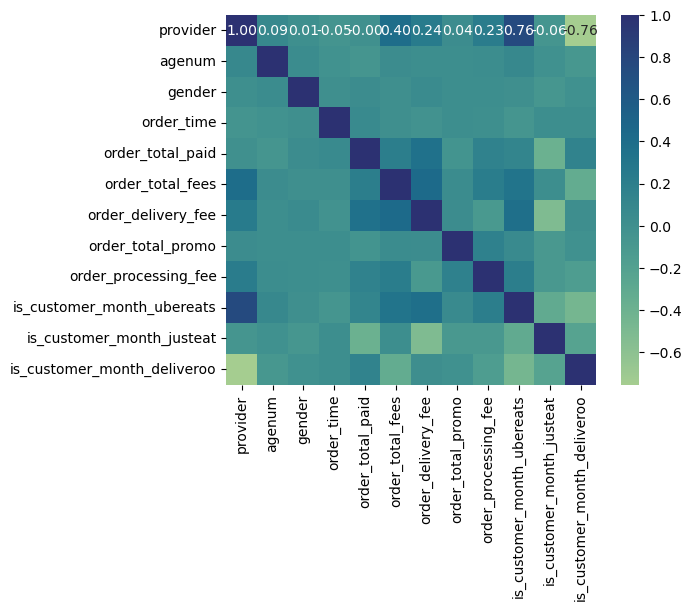

In [516]:
# matrice de corrélation sur la table transactions
sns.heatmap(transactionsc1.corr(), square=True, annot=True, cmap='crest',fmt='.2f')
plt.show()

In [517]:
# preparation table pour checker les corrélations possibles entre les variables sur la table tab_ub_del en mettant en variable num la plateforme et l'age
tab_ub_del['provider']=tab_ub_del['merchant_name'].astype('category').cat.codes
tab_ub_del['agenum']=tab_ub_del['age'].astype('category').cat.codes
transactionsc2=tab_ub_del.select_dtypes(include='number')
transactionsc2=transactionsc2[['provider','agenum', 'gender','order_time', 'order_total_paid', 'order_total_fees', 'order_delivery_fee','order_total_promo','order_processing_fee','is_customer_month_ubereats','is_customer_month_justeat', 'is_customer_month_deliveroo']]
transactionsc2.corr()

,provider,agenum,gender,order_time,order_total_paid,order_total_fees,order_delivery_fee,order_total_promo,order_processing_fee,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo
provider,1.000000,0.099193,0.003656,-0.053105,-0.051557,0.396423,0.236742,0.028685,0.222099,0.821629,0.031028,-0.828782
agenum,0.099193,1.000000,0.042552,-0.023808,-0.090834,0.036535,0.020733,0.025248,0.032388,0.098368,0.003125,-0.096551
gender,0.003656,0.042552,1.000000,0.002101,0.012265,-0.000637,0.025958,0.018010,0.018390,-0.017936,-0.053994,-0.023032
order_time,-0.053105,-0.023808,0.002101,1.000000,0.094740,0.000683,-0.010117,0.027579,0.013958,-0.051282,-0.009547,0.036707
order_total_paid,-0.051557,-0.090834,0.012265,0.094740,1.000000,0.198865,0.112655,-0.107407,0.126688,-0.063858,0.004804,0.043817
order_total_fees,0.396423,0.036535,-0.000637,0.000683,0.198865,1.000000,0.429836,0.040369,0.220950,0.321567,0.019637,-0.331591
order_delivery_fee,0.236742,0.020733,0.025958,-0.010117,0.112655,0.429836,1.000000,-0.036448,-0.225608,0.185024,0.015063,-0.195028
order_total_promo,0.028685,0.025248,0.018010,0.027579,-0.107407,0.040369,-0.036448,1.000000,0.165453,0.027559,-0.011279,-0.039706
order_processing_fee,0.222099,0.032388,0.018390,0.013958,0.126688,0.220950,-0.225608,0.165453,1.000000,0.182960,-0.019055,-0.192095
is_customer_month_ubereats,0.821629,0.098368,-0.017936,-0.051282,-0.063858,0.321567,0.185024,0.027559,0.182960,1.000000,0.034492,-0.680951


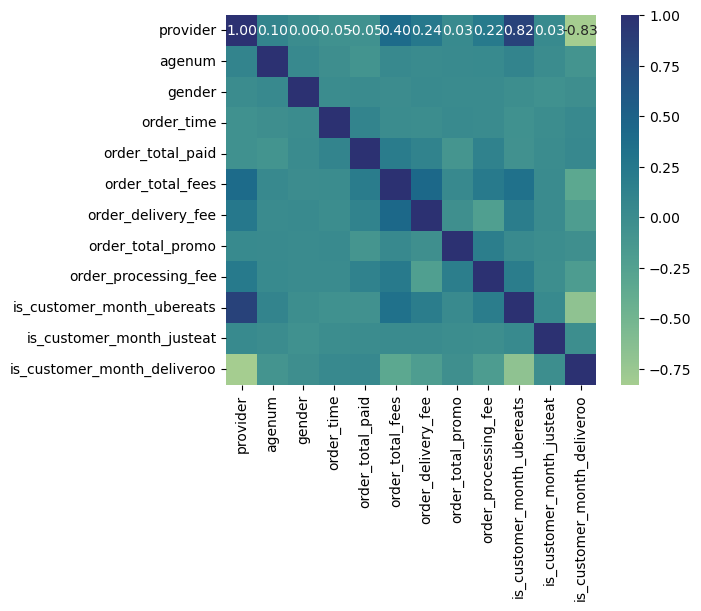

In [518]:
# matrice de corrélation sur la table tab_ub_del
sns.heatmap(transactionsc2.corr(), square=True, annot=True, cmap='crest',fmt='.2f')
plt.show()

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


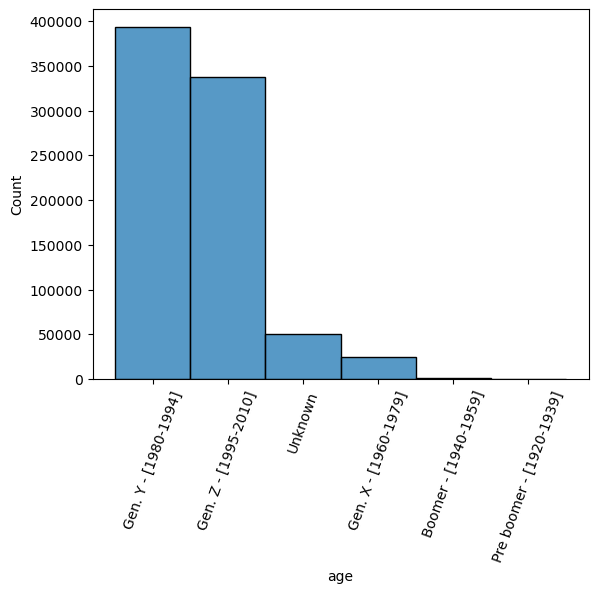

<Figure size 1400x1000 with 0 Axes>

In [519]:
# stat descriptive pour les catégories d'age
sns.histplot(transactions2['age'])
plt.xticks(rotation = 70)
plt.figure(figsize=(14,10))
plt.show()

In [520]:
# prepa analyse plateforme
pie_data = transactions2['merchant_name'].value_counts()
pie_data


merchant_name
uber eats    442797
deliveroo    260964
just eat     103915
Name: count, dtype: int64

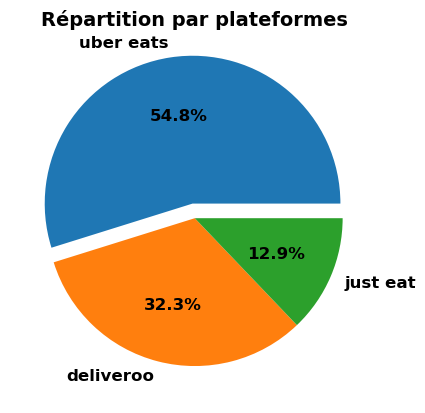

In [521]:
# stat descriptive pour les plateformes
plt.pie(pie_data.values,
        labels=pie_data.index,    #labels pour afficher les noms des catégories dans le graphique
        autopct='%0.1f%%',        # définit le nombre de chiffres significatifs du résultat affiché
        explode=[0.1, 0, 0],   # éloigne les portions choisies du centre
        textprops={'weight': 'bold', 'fontsize': 12})
plt.title('Répartition par plateformes',  fontweight='bold', fontsize=14)
plt.show()

In [522]:
# prepa analyse du sexe
pie_data2 = transactions2['sex'].value_counts()
pie_data2

sex
male       548952
female     228338
unknown     30386
Name: count, dtype: int64

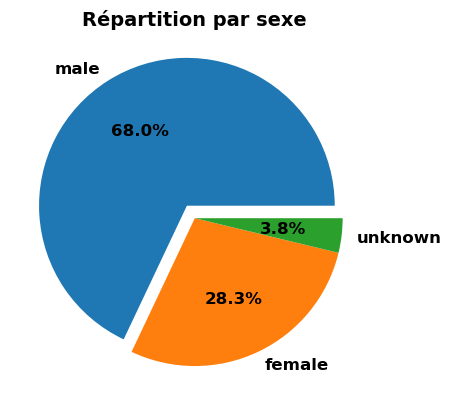

In [523]:
# stat descriptive pour le sexe
plt.pie(pie_data2.values,
        labels=pie_data2.index,    #labels pour afficher les noms des catégories dans le graphique
        autopct='%0.1f%%',        # définit le nombre de chiffres significatifs du résultat affiché
        explode=[0.1, 0, 0],   # éloigne les portions choisies du centre
        textprops={'weight': 'bold', 'fontsize': 12})
plt.title('Répartition par sexe',  fontweight='bold', fontsize=14)
plt.show()

In [524]:
#creation nouvelle table pour les données financières à prendre en compte pour l'analyse
tab_ub_del_ca = tab_ub_del

In [525]:
# isolation des valeurs à 0 sur le order total paid et la promo
tab_zero = tab_ub_del_ca[(tab_ub_del_ca['order_total_paid']==0) & (tab_ub_del_ca['order_total_promo']==0)]

In [526]:
tab_zero.index

Index([  7786,  14082,  18024,  27389,  29089,  34739,  56961,  66071,  77787,
       113025,
       ...
       790760, 796445, 796793, 798995, 800074, 800121, 801530, 805229, 805626,
       806187],
      dtype='int64', length=524)

In [527]:
#identification de la valeur du montant total de commande qui est vraiment tres élevée par rapport aux autres commandes
tab_ub_del_ca['order_total_paid'].idxmax()

745777

In [528]:
#suppression des lignes où le montant total de commande =0 et total promo=0
tab_ub_del_ca = tab_ub_del_ca.drop(tab_zero.index)

In [529]:
#suppression de la ligne où le montant total de commande est très élevé
tab_ub_del_ca = tab_ub_del_ca.drop(tab_ub_del_ca['order_total_paid'].idxmax())

In [530]:
tab_ub_del_ca

,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,day_of_week,order_delivery_fee_i,provider,agenum
1,2,1,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male,Asian,Indian,Dinner,promo applied,Other region,Thursday,2.5,1,3
2,3,1,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male,Latin american,Mexican,Lunch,no_promo,Other region,Wednesday,3.0,1,3
5,6,1,Gen. Z - [1995-2010],uber eats,2018-09-06,22,24.0,payment card - visa,2.5,0.0,2.5,0.0,pizzou,european - italian - pizza,ile de france,paris,paris,1,0,0,2018-09,male,European,Italian,Dinner,no_promo,Ile de France - Paris,Thursday,2.5,1,3
7,8,1,Gen. Y - [1980-1994],uber eats,2018-12-04,21,13.7,payment card - visa,2.5,0.0,2.5,0.0,subway,north american - sandwich,nouvelle aquitaine,gironde,bordeaux,1,0,0,2018-12,male,North american,Sandwich,Dinner,no_promo,Other region,Tuesday,2.5,1,2
8,9,2,Gen. Z - [1995-2010],uber eats,2019-11-28,21,14.5,payment card - visa,3.5,0.0,3.5,0.0,sushi m,asian - japanese - sushi,ile de france,paris,paris,1,0,0,2019-11,female,Asian,Japanese,Dinner,no_promo,Ile de France - Paris,Thursday,3.5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807658,807659,1,Gen. Z - [1995-2010],deliveroo,2020-03-12,20,24.4,Unknown,3.5,0.0,3.5,0.0,burger king,north american - burger,nouvelle aquitaine,vienne,poitiers,1,0,1,2020-03,male,North american,Burger,Dinner,no_promo,Other region,Thursday,3.5,0,3
807661,807662,1,Gen. Y - [1980-1994],deliveroo,2018-10-09,10,18.5,Unknown,0.0,0.0,0.0,0.0,massa,middle eastern - lebanese,nouvelle aquitaine,gironde,bordeaux,0,0,1,2018-10,male,Middle eastern,Lebanese,Morning,no_promo,Other region,Tuesday,0.0,0,2
807664,807665,1,Gen. X - [1960-1979],deliveroo,2018-12-18,21,35.2,Unknown,2.5,0.0,2.5,0.0,burger king,north american - burger,ile de france,paris,paris,0,0,1,2018-12,male,North american,Burger,Dinner,no_promo,Ile de France - Paris,Tuesday,2.5,0,1
807667,807668,2,Unknown,deliveroo,2019-01-28,19,13.6,Unknown,2.4,0.0,2.4,0.0,pierre sang,asian - korean,ile de france,paris,paris,0,0,1,2019-01,female,Asian,Korean,Dinner,no_promo,Ile de France - Paris,Monday,2.4,0,5


In [531]:
#nb de commandes par région
tab_ub_del.groupby('order_item_delivery_address_region')['order_total_paid'].count().round(2).sort_values(ascending=False)

order_item_delivery_address_region
ile de france                 334400
auvergne rhone alpes           85798
occitanie                      53326
nouvelle aquitaine             48599
provence alpes cote d azur     36980
hauts de france                34442
grand est                      30966
pays de la loire               27319
bretagne                       16885
normandie                      14150
centre val de loire            10164
bourgogne franche comte         6874
Unknown                         3677
reunion                          132
corse                             43
greater london                     4
cataluna                           1
canarias                           1
Name: order_total_paid, dtype: int64

In [532]:
#CA par type de cuisine (catégories et sous-catégories)
tab_ub_del_ca.groupby(['Category_name','Sub_category_name'])['order_total_paid'].sum().round(0)

Category_name   Sub_category_name      
African         African                      79001.0
Asian           Asian - Others              333516.0
                Chinese                     256136.0
                Indian                      517458.0
                Japanese                   1795080.0
                Korean                      102328.0
                Thai                        613717.0
                Vietnamese                  366040.0
European        British                      10260.0
                European - Others           154332.0
                French                      603867.0
                Italian                    2060445.0
                Salad                       168016.0
                Spanish                      11904.0
Latin american  Latin american - Others      35282.0
                Mexican                    1092265.0
                Peruvian                      3886.0
Middle eastern  Kebab                       259252.0
      

In [533]:
#nb de commandes par type de cuisine et si promo
tab_ub_del.groupby(['Category_name','promo_yes'])['order_total_paid'].count().to_frame()

order_total_paid
Category_name  promo_yes                      
African        no_promo                   2940
               promo applied               400
Asian          no_promo                 123852
               promo applied             22033
European       no_promo                 110161
               promo applied             17634
Latin american no_promo                  50645
               promo applied              8623
Middle eastern no_promo                  24790
               promo applied              3778
North american no_promo                 281581
               promo applied             36183
Others         no_promo                  14281
               promo applied              1997
Unknown        no_promo                   3853
               promo applied              1010

In [534]:
#nb de commandes par plateforme
tab_ub_del.groupby('merchant_name')['order_total_paid'].count().sort_values(ascending=False)

merchant_name
uber eats    442797
deliveroo    260964
Name: order_total_paid, dtype: int64

In [535]:
#mean of total fees par merchant
tab_ub_del_ca.groupby('merchant_name')['order_total_fees'].mean()

merchant_name
deliveroo    2.264389
uber eats    4.402425
Name: order_total_fees, dtype: float64

In [536]:
#pourcentage des total fees/ montant de commande par plateform
(tab_ub_del_ca.groupby('merchant_name')['order_total_fees'].sum()/tab_ub_del_ca.groupby('merchant_name')['order_total_paid'].sum())*100

merchant_name
deliveroo     9.284874
uber eats    19.156478
dtype: float64

In [537]:
# moyenne des fees par plateforme et par période
totalfee = tab_ub_del_ca.groupby(['merchant_name','periode'])['order_total_fees'].mean()
totalfee=totalfee.reset_index()

In [538]:
totalfee

,merchant_name,periode,order_total_fees
0,deliveroo,2017-01,2.552104
1,deliveroo,2017-02,2.572870
2,deliveroo,2017-03,2.569057
3,deliveroo,2017-04,2.537509
4,deliveroo,2017-05,2.568442
...,...,...,...
79,uber eats,2020-02,4.695219
80,uber eats,2020-03,3.666602
81,uber eats,2020-04,5.042152
82,uber eats,2020-05,5.152804


In [539]:
#modification de type pour la variable periode pour l'utiliser dans les graph
totalfee['periode']=totalfee['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


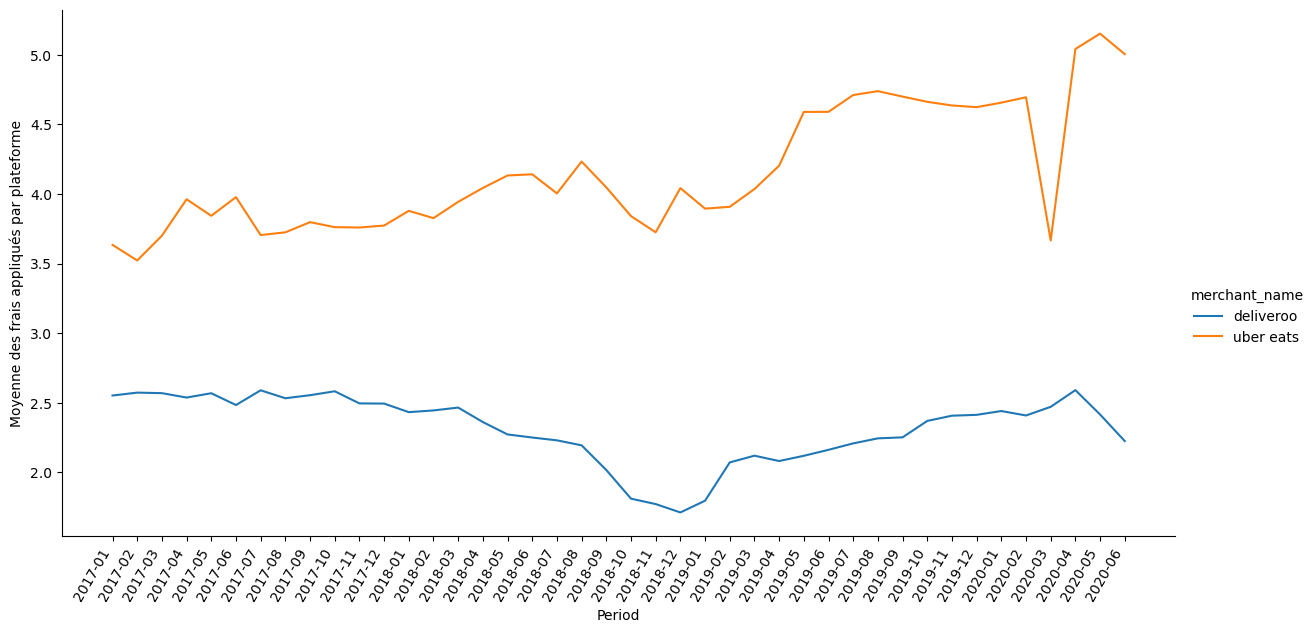

In [540]:
#Graphique montrant l'évolution des fees dans le temps par plateforme
sns.relplot(data=totalfee, x='periode', y='order_total_fees', hue='merchant_name', kind="line", height=6, aspect=2)
plt.xticks(rotation=60, ha='right')
plt.xlabel('Period')
plt.ylabel('Moyenne des frais appliqués par plateforme')
plt.show()


In [541]:
# moyenne des delivery fees par plateforme et par période
delfee = tab_ub_del_ca.groupby(['merchant_name','periode'])['order_delivery_fee'].mean()
delfee=delfee.reset_index()
delfee

,merchant_name,periode,order_delivery_fee
0,deliveroo,2017-01,2.552104
1,deliveroo,2017-02,2.572870
2,deliveroo,2017-03,2.569057
3,deliveroo,2017-04,2.537509
4,deliveroo,2017-05,2.568442
...,...,...,...
79,uber eats,2020-02,2.995723
80,uber eats,2020-03,2.073240
81,uber eats,2020-04,3.407302
82,uber eats,2020-05,1.865971


In [542]:
delfee['periode'] = delfee['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

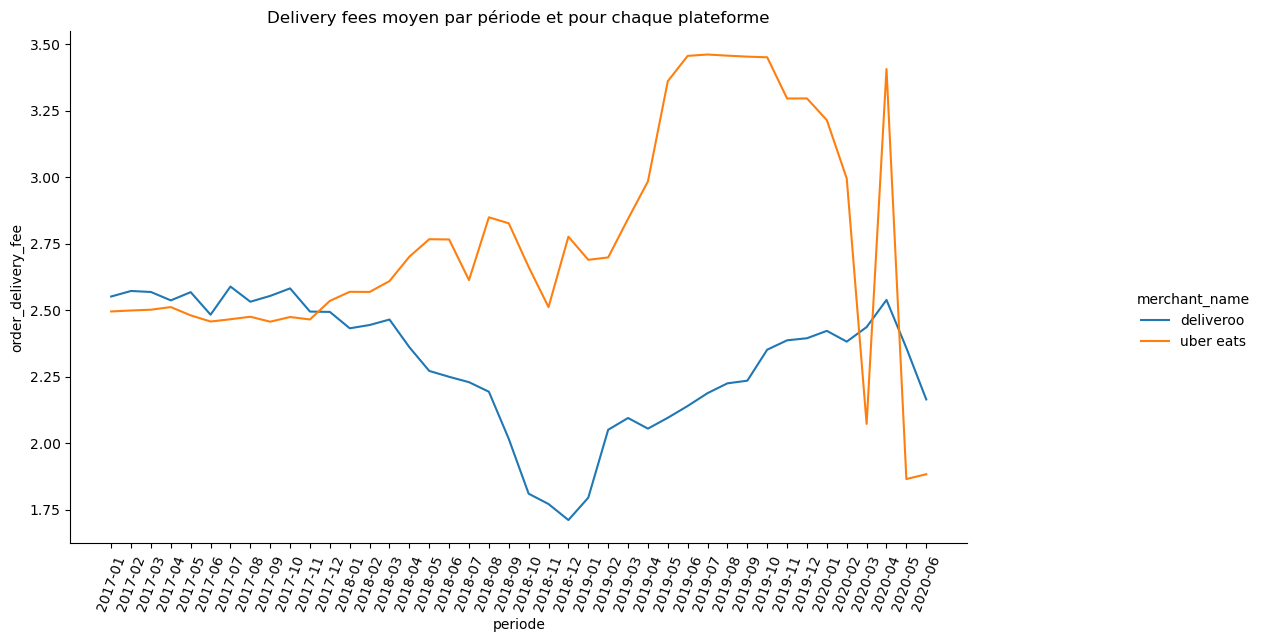

In [543]:
#Delivery fees moyen par période et pour chaque plateforme
plt.figure(figsize=(10,8))
sns.relplot(data=delfee, x='periode', y='order_delivery_fee', kind='line', hue='merchant_name')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Delivery fees moyen par période et pour chaque plateforme')
plt.show()

In [544]:
# moyenne des processing fees par plateforme et par période
profee = tab_ub_del_ca.groupby(['merchant_name','periode'])['order_processing_fee'].mean()
profee=profee.reset_index()
profee

,merchant_name,periode,order_processing_fee
0,deliveroo,2017-01,0.000000
1,deliveroo,2017-02,0.000000
2,deliveroo,2017-03,0.000000
3,deliveroo,2017-04,0.000000
4,deliveroo,2017-05,0.000000
...,...,...,...
79,uber eats,2020-02,0.432097
80,uber eats,2020-03,0.202660
81,uber eats,2020-04,0.001268
82,uber eats,2020-05,1.903476


In [545]:
profee['periode'] = profee['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

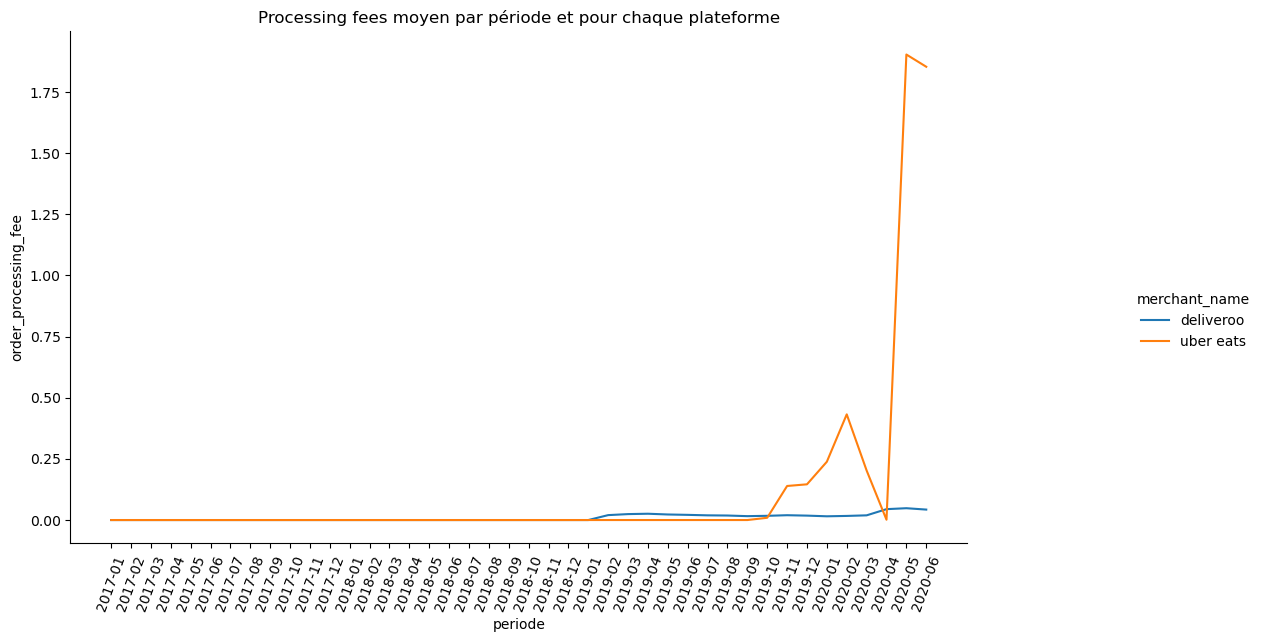

In [546]:
#Processing fees moyen par période et pour chaque plateforme
plt.figure(figsize=(10,8))
sns.relplot(data=profee, x='periode', y='order_processing_fee', kind='line', hue='merchant_name')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Processing fees moyen par période et pour chaque plateforme')
plt.show()

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


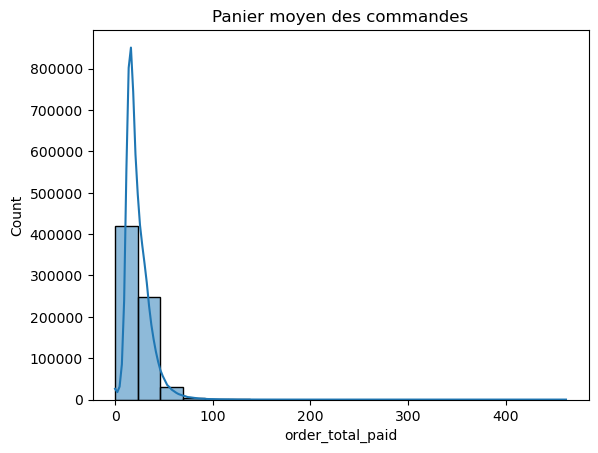

In [547]:
# Répartition des montants de commande
sns.histplot(tab_ub_del_ca['order_total_paid'], bins=20, kde=True)
#plt.gcf().set_size_inches(14,6)
#plt.xticks(rotation=70)
plt.title('Panier moyen des commandes')
plt.show()

In [548]:
#montant moyen de commande par plateforme et par période
totalpaid = tab_ub_del_ca.groupby(['merchant_name','periode'])['order_total_paid'].mean()
totalpaid=totalpaid.reset_index()

In [549]:
totalpaid['periode']=totalpaid['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


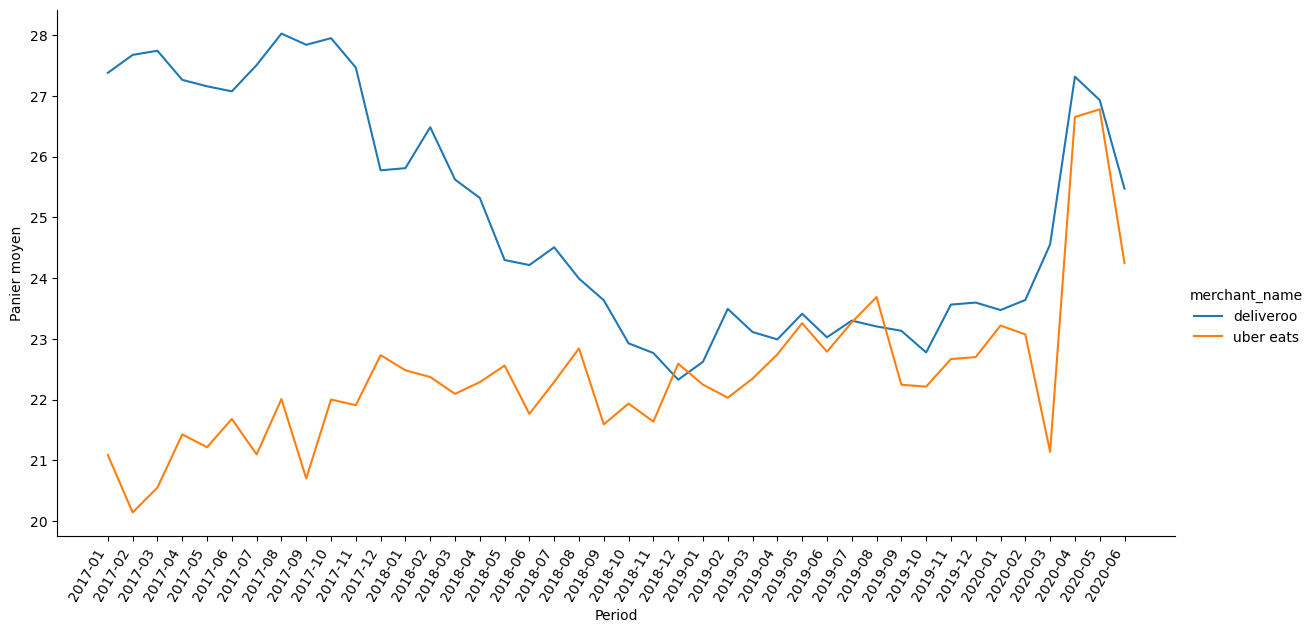

In [550]:
#Graph montrant l'évolution du panier moyen dans le temps pour chaque plateforme
sns.relplot(data=totalpaid, x='periode', y='order_total_paid', hue='merchant_name', kind="line", height=6, aspect=2)
plt.xticks(rotation=60, ha='right')
plt.xlabel('Period')
plt.ylabel('Panier moyen')
plt.show()

In [551]:
#Nombre de commandes par plateforme et par période
totalvolume = tab_ub_del.groupby(['merchant_name','periode'])['order_total_paid'].count()
totalvolume=totalvolume.reset_index()

In [552]:
totalvolume

,merchant_name,periode,order_total_paid
0,deliveroo,2017-01,2502
1,deliveroo,2017-02,2484
2,deliveroo,2017-03,3018
3,deliveroo,2017-04,2830
4,deliveroo,2017-05,2804
...,...,...,...
79,uber eats,2020-02,20037
80,uber eats,2020-03,20039
81,uber eats,2020-04,14833
82,uber eats,2020-05,29674


In [553]:
totalvolume['periode']=totalvolume['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


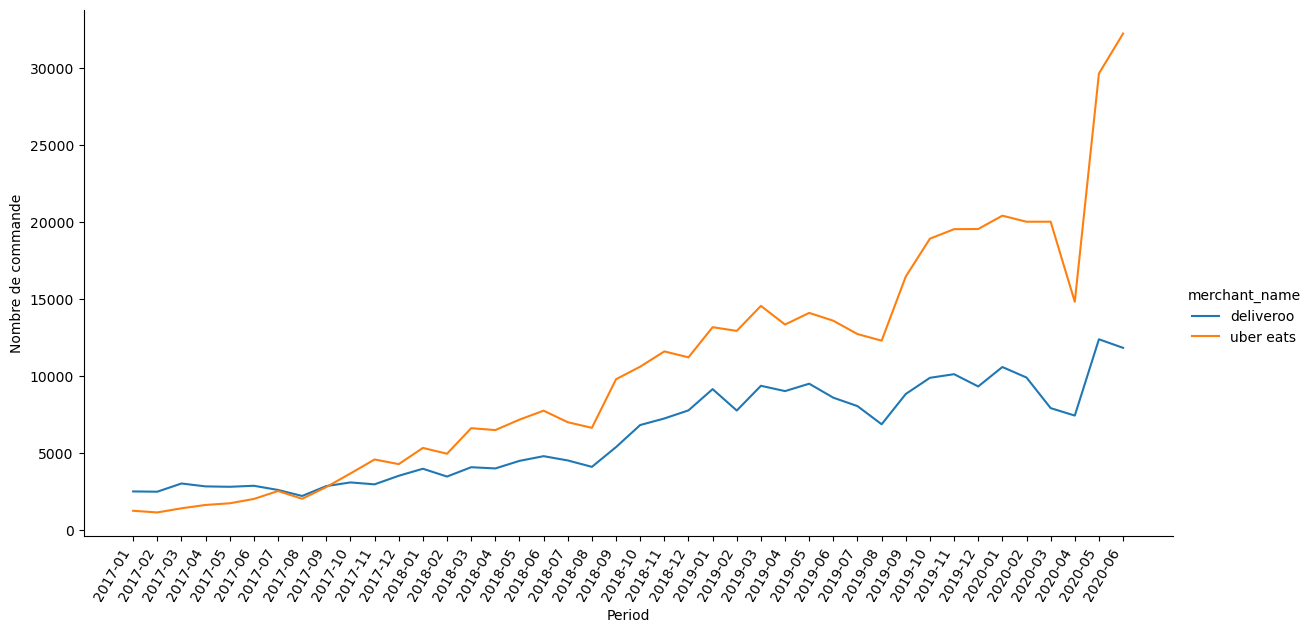

In [554]:
#Graph montrant l'évolution du nombre de commandes dans le temps pour chaque plateforme
sns.relplot(data=totalvolume, x='periode', y='order_total_paid', hue='merchant_name', kind="line", height=6, aspect=2)
plt.xticks(rotation=60, ha='right')
plt.xlabel('Period')
plt.ylabel('Nombre de commande')
plt.show()

In [555]:
#Nombre de commandes par période et sexe
t3=tab_ub_del.groupby(['periode','sex'])['row_nb'].count().to_frame()
t3 = t3.reset_index()
t3

,periode,sex,row_nb
0,2017-01,female,1366
1,2017-01,male,2340
2,2017-01,unknown,41
3,2017-02,female,1277
4,2017-02,male,2289
...,...,...,...
121,2020-05,male,28000
122,2020-05,unknown,2330
123,2020-06,female,12626
124,2020-06,male,28943


In [556]:
t3['periode'] = t3['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

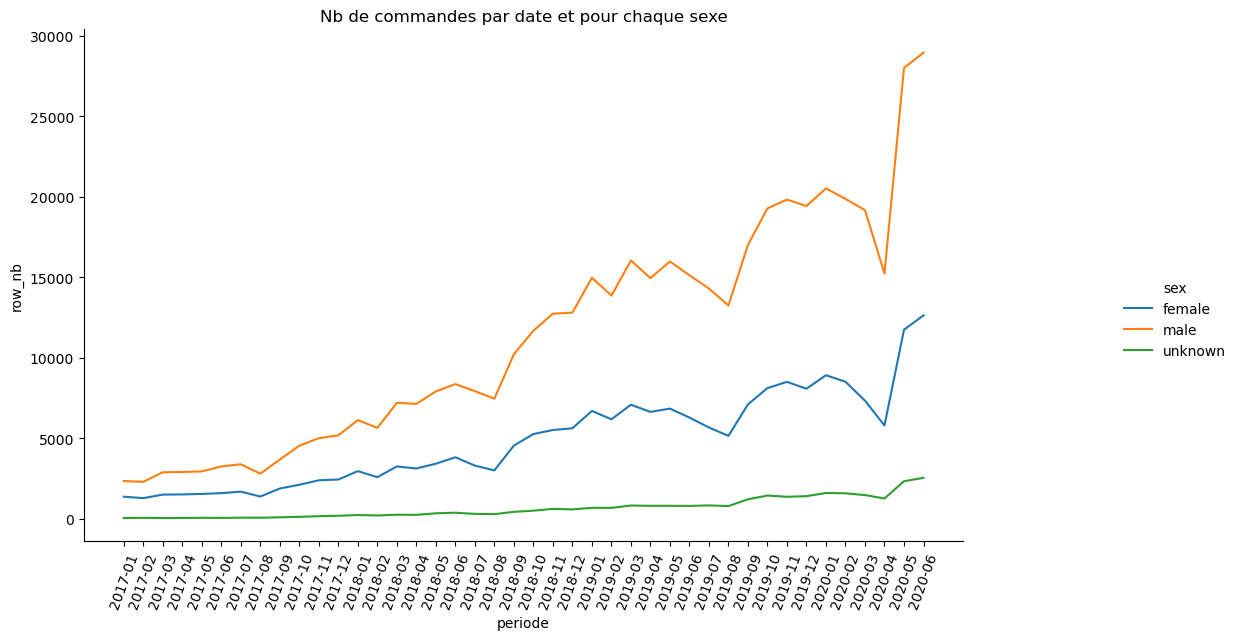

In [557]:
#Nb de commandes par date et pour chaque sexe
plt.figure(figsize=(10,8))
sns.relplot(data=t3, x='periode', y='row_nb', kind='line', hue='sex')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Nb de commandes par date et pour chaque sexe')
plt.show()

In [558]:
#Panier moyen par période et sexe
t4=tab_ub_del_ca.groupby(['periode', 'sex'])['order_total_paid'].mean().to_frame()
t4 = t4.reset_index()
t4

,periode,sex,order_total_paid
0,2017-01,female,25.501909
1,2017-01,male,25.147519
2,2017-01,unknown,25.895000
3,2017-02,female,25.131975
4,2017-02,male,25.429654
...,...,...,...
121,2020-05,male,26.324403
122,2020-05,unknown,25.118248
123,2020-06,female,25.600127
124,2020-06,male,24.256238


In [559]:
t4['periode'] = t4['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

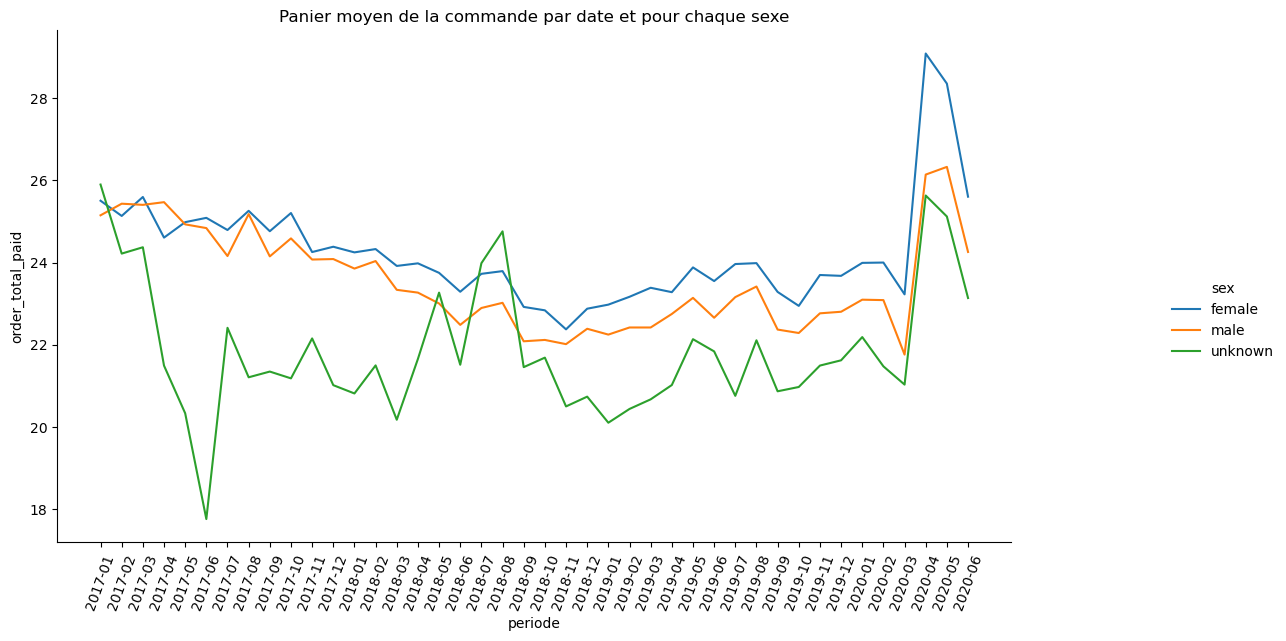

In [560]:
#Panier moyen de la commande par date et pour chaque sexe
plt.figure(figsize=(10,8))
sns.relplot(data=t4, x='periode', y='order_total_paid', kind='line', hue='sex')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Panier moyen de la commande par date et pour chaque sexe')
plt.show()

In [561]:
#Panier moyen par sexe
cmdmoysex=tab_ub_del_ca.groupby(['sex'])['order_total_paid'].mean().to_frame()
cmdmoysex = cmdmoysex.reset_index()
cmdmoysex

,sex,order_total_paid
0,female,24.192993
1,male,23.287573
2,unknown,22.070640


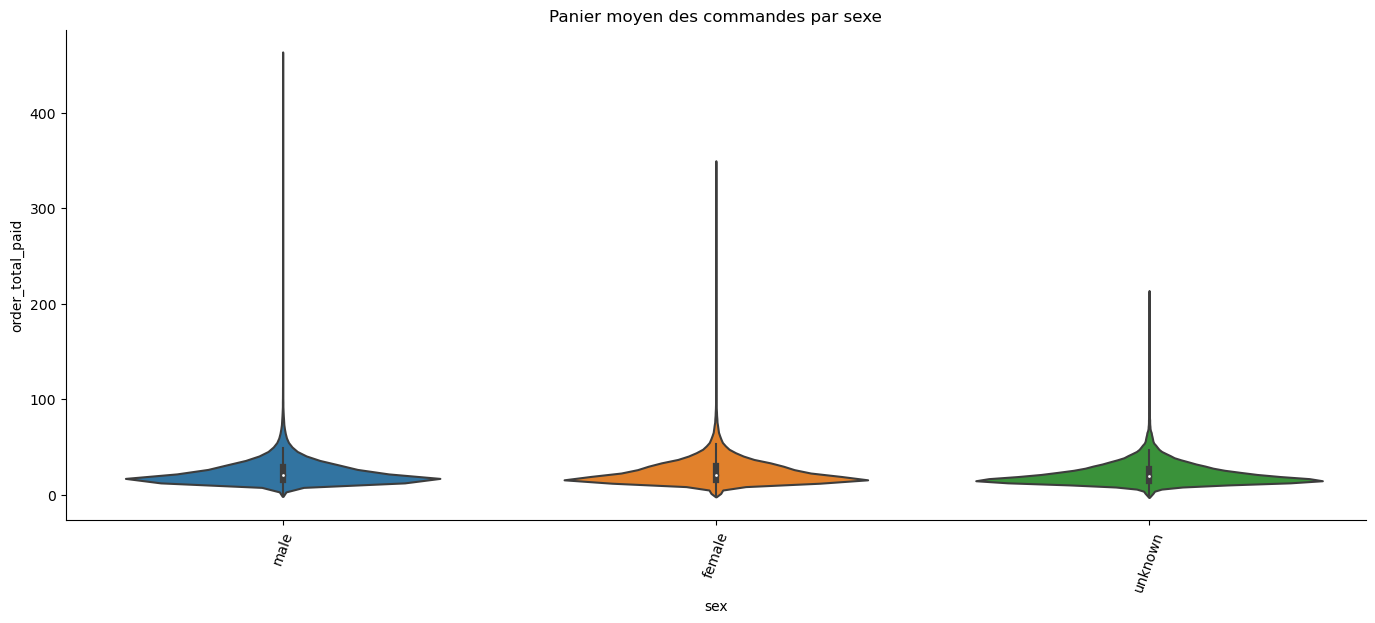

In [562]:
#Panier moyen des commandes par sexe
sns.catplot(data=tab_ub_del_ca, x='sex', y='order_total_paid', height=4, aspect=3, kind='violin')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Panier moyen des commandes par sexe')
plt.show()

In [563]:
#Montant des commandes pour les femmes
paid_femme=tab_ub_del_ca[tab_ub_del_ca['sex']=='female']
paid_femme2=paid_femme['order_total_paid']
paid_femme2

8         14.5
15        30.1
29         5.3
30         9.3
31        25.9
          ... 
807634    28.1
807635    27.4
807639    27.4
807648    11.7
807667    13.6
Name: order_total_paid, Length: 203995, dtype: float64

In [564]:
#Montant des commandes pour les hommes
paid_male=tab_ub_del_ca[tab_ub_del_ca['sex']=='male']
paid_male2=paid_male['order_total_paid']
paid_male2

1          7.6
2         10.6
5         24.0
7         13.7
12        13.3
          ... 
807656    19.9
807658    24.4
807661    18.5
807664    35.2
807670    24.5
Name: order_total_paid, Length: 471639, dtype: float64

In [565]:
#calcul pour calculer la pvalue pour comparer le panier moyen entre les hommes et les femmes avec la bdd actuelle
m0=np.mean(paid_femme2)
m1=np.mean(paid_male2)
n0=len(paid_femme2)
n1=len(paid_male2)
std0=np.std(paid_femme2)
std1=np.std(paid_male2)
m0, n0, std0, m1, n1, std1

(24.19299296551386,
 203995,
 13.2681190502896,
 23.287572698610585,
 471639,
 12.564303696696337)

In [566]:
num=m1-m0
denum=np.sqrt((((std0*std0)/n0))+((std1*std1)/n1))
z=num/denum
z

-26.16247152815858

In [567]:
x=0.9999
pvalue=2*(1-x)
pvalue
# pas fiable car effectif trop different entre homme et femme

0.00019999999999997797

In [568]:
#nouveau calcul pvalue en faisant un random choice de 1000 valeurs issues de la bdd
female_sample=np.random.choice(paid_femme2, replace=True, size=1000)
male_sample=np.random.choice(paid_male2, replace=True, size=1000)

In [569]:
mf1=np.mean(female_sample)
mm1=np.mean(male_sample)
nf1=len(female_sample)
nm1=len(male_sample)
stdf1=np.std(female_sample)
stdm1=np.std(male_sample)
mf1, nf1, stdf1, mm1, nm1, stdm1

(24.0127,
 1000,
 12.570103766874798,
 23.658199999999997,
 1000,
 12.789635364622404)

In [570]:
num1=mf1-mm1
denum1=np.sqrt((((stdf1*stdf1)/nf1))+((stdm1*stdm1)/nm1))
z1=num1/denum1
z1

0.6251297730329266

In [571]:
x1=0.9887
pvalue1=2*(1-x1)
pvalue1

0.022599999999999953

In [572]:
#nouveau calcul pvalue en faisant un random normal de 1000 valeurs en prenant en compte la moyenne et l'ecart type correspondant à chaque sexe de la bdd
female_sample2=np.random.normal(m0, std0, 1000)
male_sample2=np.random.normal(m1, std1, 1000)

In [573]:
mf2=np.mean(female_sample2)
mm2=np.mean(male_sample2)
nf2=len(female_sample2)
nm2=len(male_sample2)
stdf2=np.std(female_sample2)
stdm2=np.std(male_sample2)
mf2, nf2, stdf2, mm2, nm2, stdm2

(24.187652646119545,
 1000,
 13.10896324433887,
 23.181505963509615,
 1000,
 11.87127090177878)

In [574]:
num2=mf2-mm2
denum2=np.sqrt((((stdf2*stdf2)/nf2))+((stdm2*stdm2)/nm2))
z2=num2/denum2
z2

1.7990671466940655

In [575]:
x2=0.8849
pvalue2=2*(1-x2)
pvalue2

0.23019999999999996

In [576]:
#nombre de commandes par période et age
t5=tab_ub_del.groupby(['periode','age'])['row_nb'].count().to_frame()
t5

row_nb
periode age                             
2017-01 Boomer - [1940-1959]           8
        Gen. X - [1960-1979]         152
        Gen. Y - [1980-1994]        2445
        Gen. Z - [1995-2010]         839
        Pre boomer - [1920-1939]       6
...                                  ...
2020-06 Gen. X - [1960-1979]        1319
        Gen. Y - [1980-1994]       18651
        Gen. Z - [1995-2010]       21234
        Pre boomer - [1920-1939]      17
        Unknown                     2819

[251 rows x 1 columns]

In [577]:
#nombre de commandes par période pour les générations X, Y et Z, clients majoritaires
t5=tab_ub_del.groupby(['periode','age'])['row_nb'].count().to_frame().reset_index()
t5x=t5[t5['age']=='Gen. X - [1960-1979]']
t5y=t5[t5['age']=='Gen. Y - [1980-1994]']
t5z=t5[t5['age']=='Gen. Z - [1995-2010]']
t5xy=pd.concat([t5x,t5y], axis=0)
t5xyz=pd.concat([t5xy,t5z], axis=0)
t5xyz = t5xyz.reset_index()
t5xyz

,index,periode,age,row_nb
0,1,2017-01,Gen. X - [1960-1979],152
1,7,2017-02,Gen. X - [1960-1979],156
2,13,2017-03,Gen. X - [1960-1979],218
3,19,2017-04,Gen. X - [1960-1979],190
4,25,2017-05,Gen. X - [1960-1979],172
...,...,...,...,...
121,224,2020-02,Gen. Z - [1995-2010],14579
122,230,2020-03,Gen. Z - [1995-2010],13985
123,236,2020-04,Gen. Z - [1995-2010],10205
124,242,2020-05,Gen. Z - [1995-2010],19992


In [578]:
t5xyz['periode'] = t5xyz['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

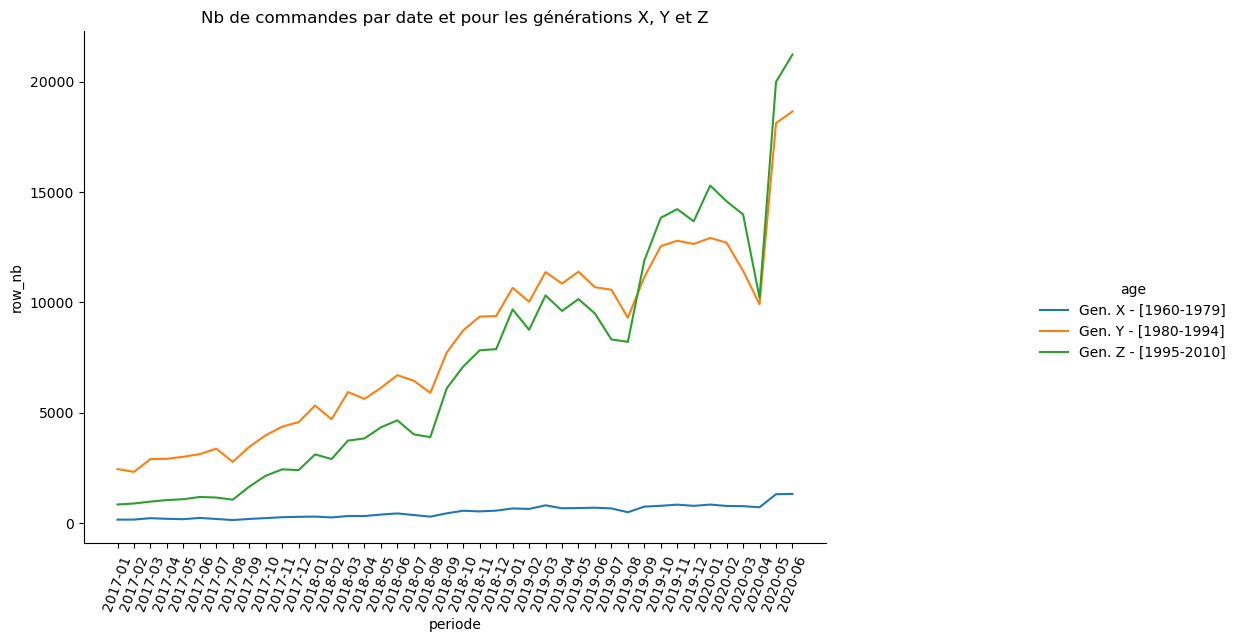

In [579]:
#Nb de commandes par date et pour les générations X, Y et Z
plt.figure(figsize=(10,8))
sns.relplot(data=t5xyz, x='periode', y='row_nb', kind='line', hue='age')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Nb de commandes par date et pour les générations X, Y et Z')
plt.show()

In [580]:
#Panier moyen par categorie d'age
cmdmoyage=tab_ub_del_ca.groupby(['age'])['order_total_paid'].mean().to_frame()
cmdmoyage = cmdmoyage.sort_values(by='order_total_paid', ascending=False).reset_index()
cmdmoyage

,age,order_total_paid
0,Gen. X - [1960-1979],29.948696
1,Gen. Y - [1980-1994],24.866084
2,Unknown,24.212132
3,Boomer - [1940-1959],23.495821
4,Pre boomer - [1920-1939],21.719926
5,Gen. Z - [1995-2010],21.405116


<Figure size 1000x800 with 0 Axes>

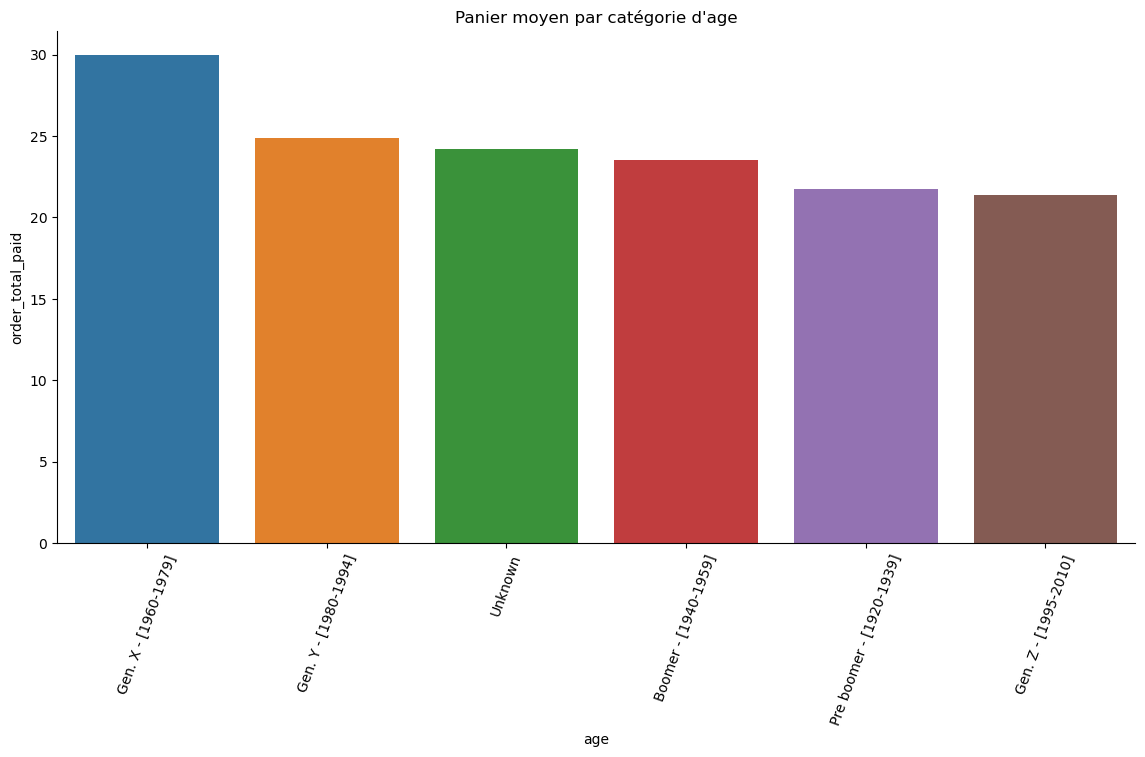

In [581]:
#Panier moyen par catégorie d'age
plt.figure(figsize=(10,8))
sns.catplot(data=cmdmoyage, x='age', y='order_total_paid', kind='bar')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title("Panier moyen par catégorie d'age")
plt.show()

In [582]:
#Panier moyen par période pour les générations X, Y et Z, clients majoritaires
t6=tab_ub_del_ca.groupby(['periode', 'age'])['order_total_paid'].mean().to_frame().reset_index()
t6x=t6[t6['age']=='Gen. X - [1960-1979]']
t6y=t6[t6['age']=='Gen. Y - [1980-1994]']
t6z=t6[t6['age']=='Gen. Z - [1995-2010]']
t6xy=pd.concat([t6x,t6y], axis=0)
t6xyz=pd.concat([t6xy,t6z], axis=0)
t6xyz = t6xyz.reset_index()
t6xyz

,index,periode,age,order_total_paid
0,1,2017-01,Gen. X - [1960-1979],32.453947
1,7,2017-02,Gen. X - [1960-1979],33.621795
2,13,2017-03,Gen. X - [1960-1979],33.678899
3,19,2017-04,Gen. X - [1960-1979],30.348421
4,25,2017-05,Gen. X - [1960-1979],32.147093
...,...,...,...,...
121,224,2020-02,Gen. Z - [1995-2010],21.447831
122,230,2020-03,Gen. Z - [1995-2010],20.019647
123,236,2020-04,Gen. Z - [1995-2010],25.023966
124,242,2020-05,Gen. Z - [1995-2010],25.170543


In [583]:
t6xyz['periode'] = t6xyz['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

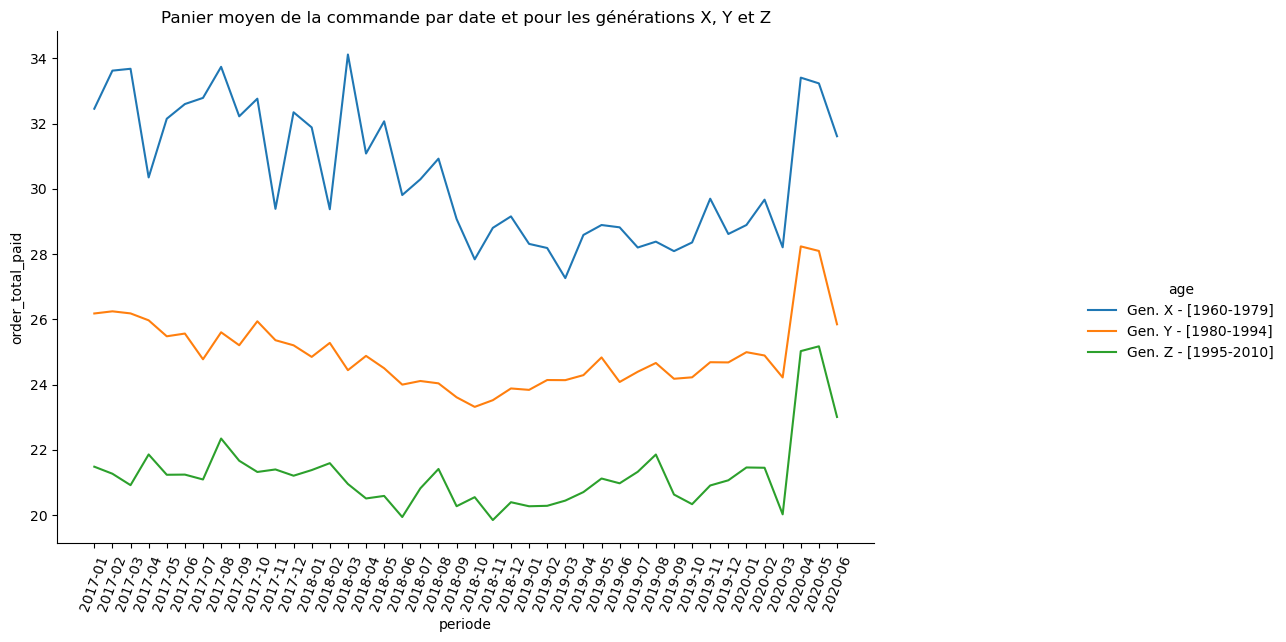

In [584]:
#Panier moyen de la commande par date et pour les générations X, Y et Z
plt.figure(figsize=(10,8))
sns.relplot(data=t6xyz, x='periode', y='order_total_paid', kind='line', hue='age')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Panier moyen de la commande par date et pour les générations X, Y et Z')
plt.show()

In [585]:
#Nombre de commandes par période et par type de cuisine
t7=tab_ub_del.groupby(['periode','Category_name'])['row_nb'].count().to_frame()
t7 = t7.reset_index()
t7

,periode,Category_name,row_nb
0,2017-01,African,22
1,2017-01,Asian,1104
2,2017-01,European,903
3,2017-01,Latin american,174
4,2017-01,Middle eastern,150
...,...,...,...
331,2020-06,Latin american,3215
332,2020-06,Middle eastern,1710
333,2020-06,North american,21126
334,2020-06,Others,1009


In [586]:
t7['periode'] = t7['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

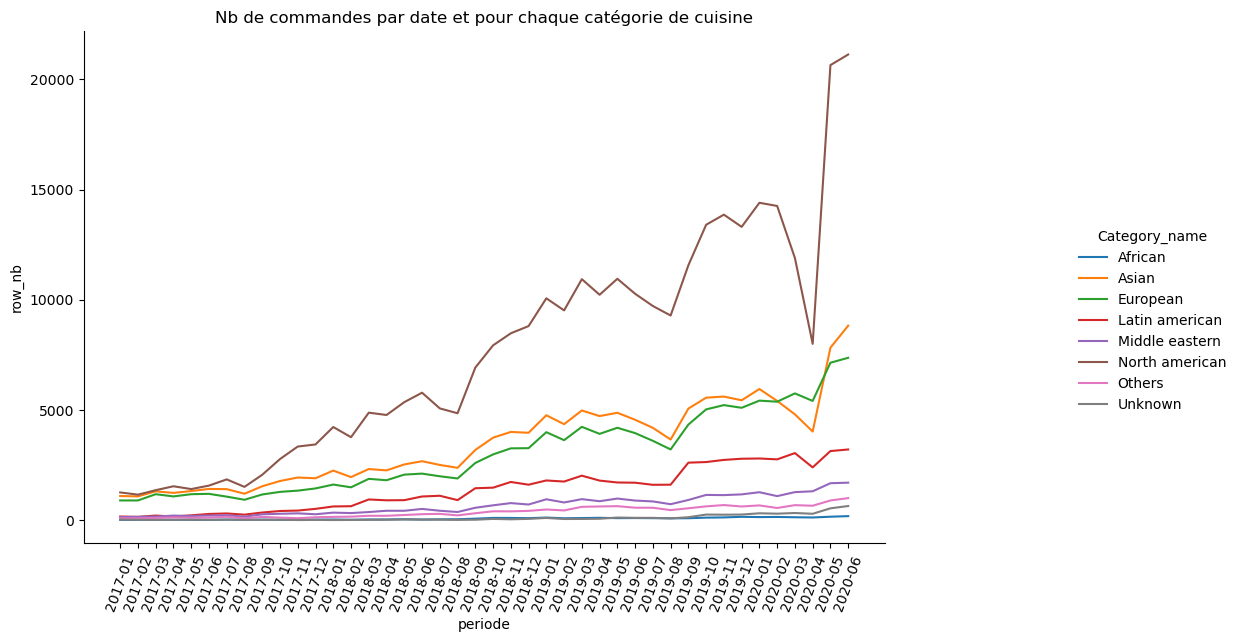

In [587]:
#Nb de commandes par date et pour chaque catégorie de cuisine
plt.figure(figsize=(10,8))
sns.relplot(data=t7, x='periode', y='row_nb', kind='line', hue='Category_name')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Nb de commandes par date et pour chaque catégorie de cuisine')
plt.show()

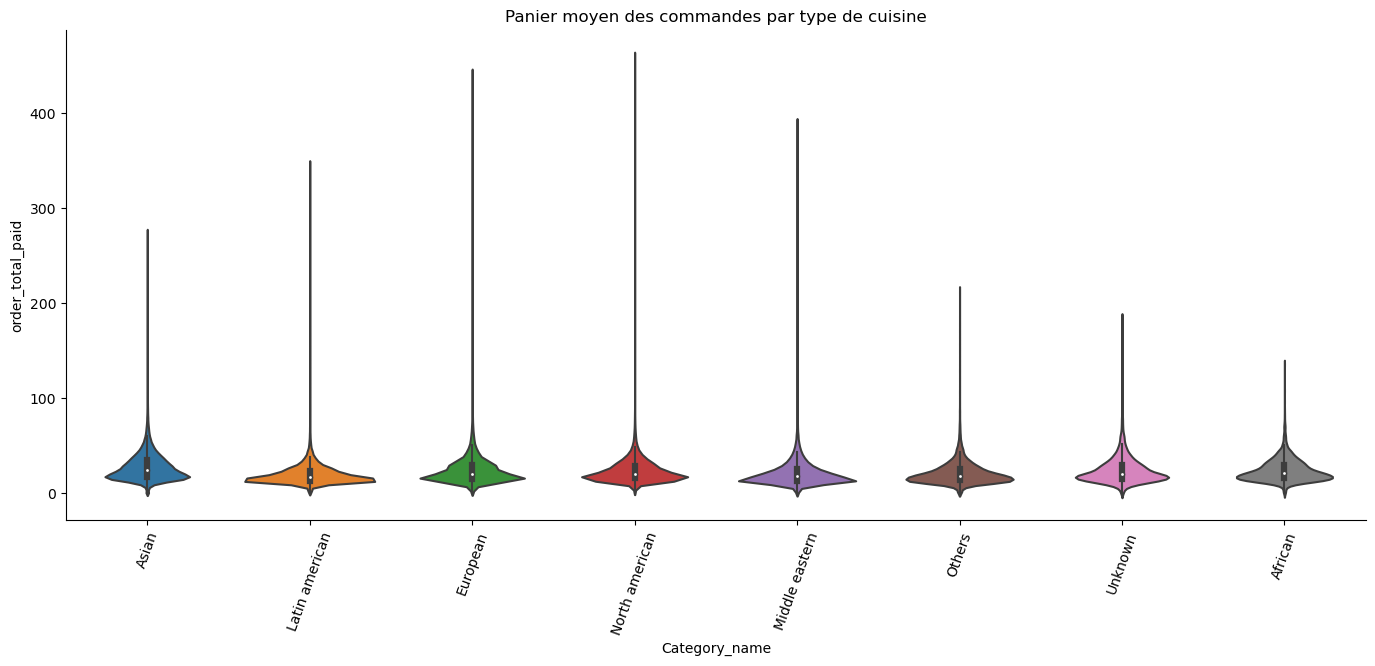

In [588]:
#Panier moyen des commandes par type de cuisine
sns.catplot(data=tab_ub_del_ca, x='Category_name', y='order_total_paid', height=4, aspect=3, kind='violin')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Panier moyen des commandes par type de cuisine')
plt.show()

In [589]:
#Panier moyen par période et catégorie de cuisine
t8=tab_ub_del_ca.groupby(['periode', 'Category_name'])['order_total_paid'].mean().to_frame()
t8 = t8.reset_index()
t8

,periode,Category_name,order_total_paid
0,2017-01,African,30.854545
1,2017-01,Asian,27.115775
2,2017-01,European,25.378468
3,2017-01,Latin american,20.730460
4,2017-01,Middle eastern,26.255333
...,...,...,...
331,2020-06,Latin american,20.076198
332,2020-06,Middle eastern,21.212932
333,2020-06,North american,23.860611
334,2020-06,Others,22.884707


In [590]:
t8['periode'] = t8['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

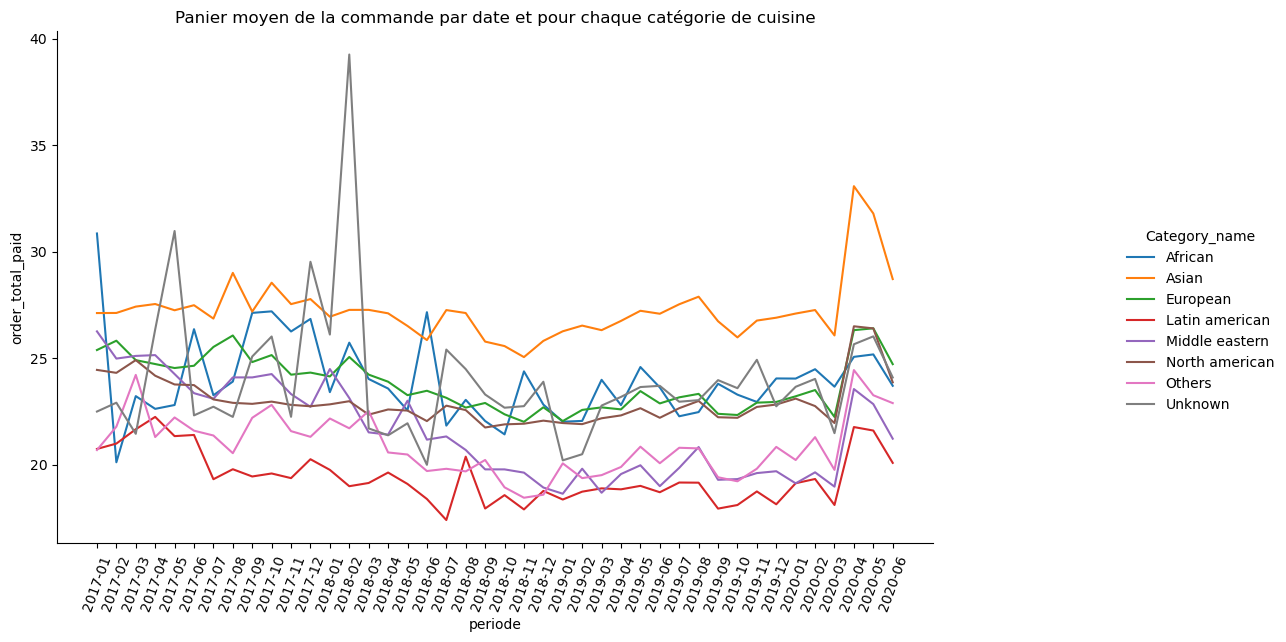

In [591]:
#Panier moyen de la commande par date et pour chaque catégorie de cuisine
plt.figure(figsize=(10,8))
sns.relplot(data=t8, x='periode', y='order_total_paid', kind='line', hue='Category_name')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Panier moyen de la commande par date et pour chaque catégorie de cuisine')
plt.show()

In [592]:
#Nombre de commandes par plateforme et par type de cuisine
nbplatcuisine=tab_ub_del.groupby(['Category_name', 'merchant_name'])['row_nb'].count().to_frame()
nbplatcuisine = nbplatcuisine.reset_index()
nbplatcuisine

,Category_name,merchant_name,row_nb
0,African,deliveroo,1306
1,African,uber eats,2034
2,Asian,deliveroo,68099
3,Asian,uber eats,77786
4,European,deliveroo,59731
5,European,uber eats,68064
6,Latin american,deliveroo,16013
7,Latin american,uber eats,43255
8,Middle eastern,deliveroo,11710
9,Middle eastern,uber eats,16858


c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

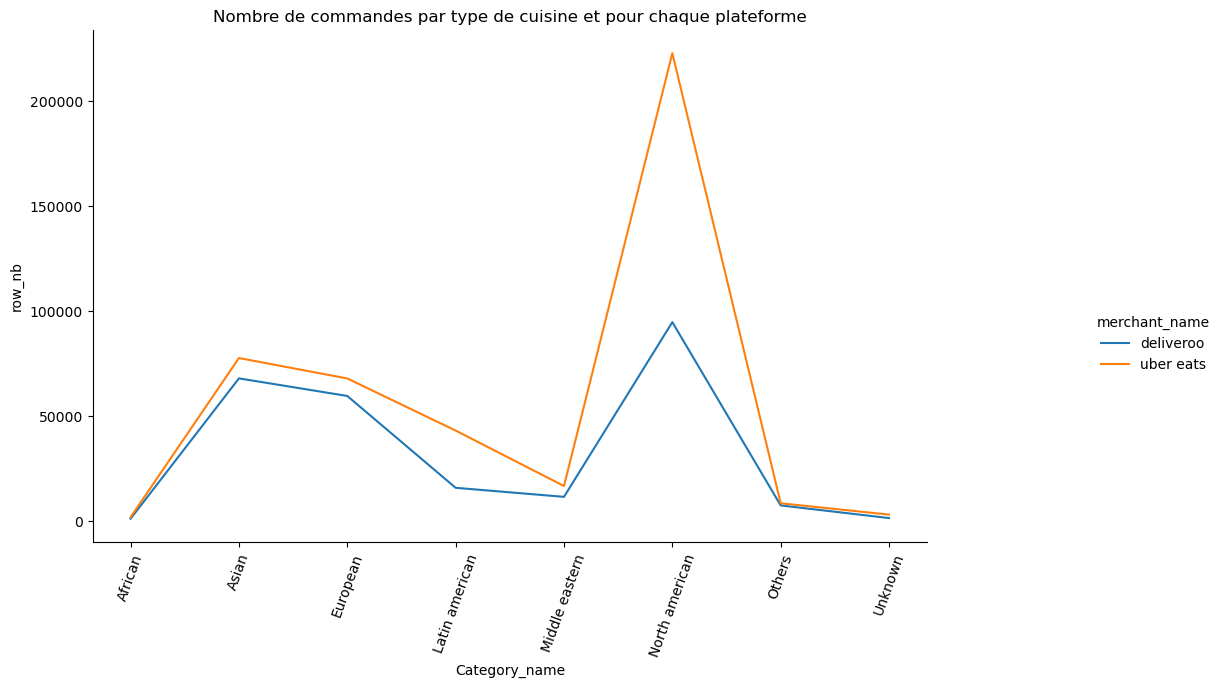

In [593]:
#nb de commandes par type de cuisine et pour chaque plateforme
plt.figure(figsize=(10,8))
sns.relplot(data=nbplatcuisine, x='Category_name', y='row_nb', kind='line', hue='merchant_name')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Nombre de commandes par type de cuisine et pour chaque plateforme')
plt.show()

In [594]:
#Nombre de commandes par catégorie de cuisine et sexe
nbcuisinesex=tab_ub_del.groupby(['Category_name', 'sex'])['row_nb'].count().to_frame()
nbcuisinesex = nbcuisinesex.reset_index()
nbcuisinesex

,Category_name,sex,row_nb
0,African,female,1017
1,African,male,2166
2,African,unknown,157
3,Asian,female,52718
4,Asian,male,89045
5,Asian,unknown,4122
6,European,female,38542
7,European,male,85011
8,European,unknown,4242
9,Latin american,female,11367


<Figure size 1000x800 with 0 Axes>

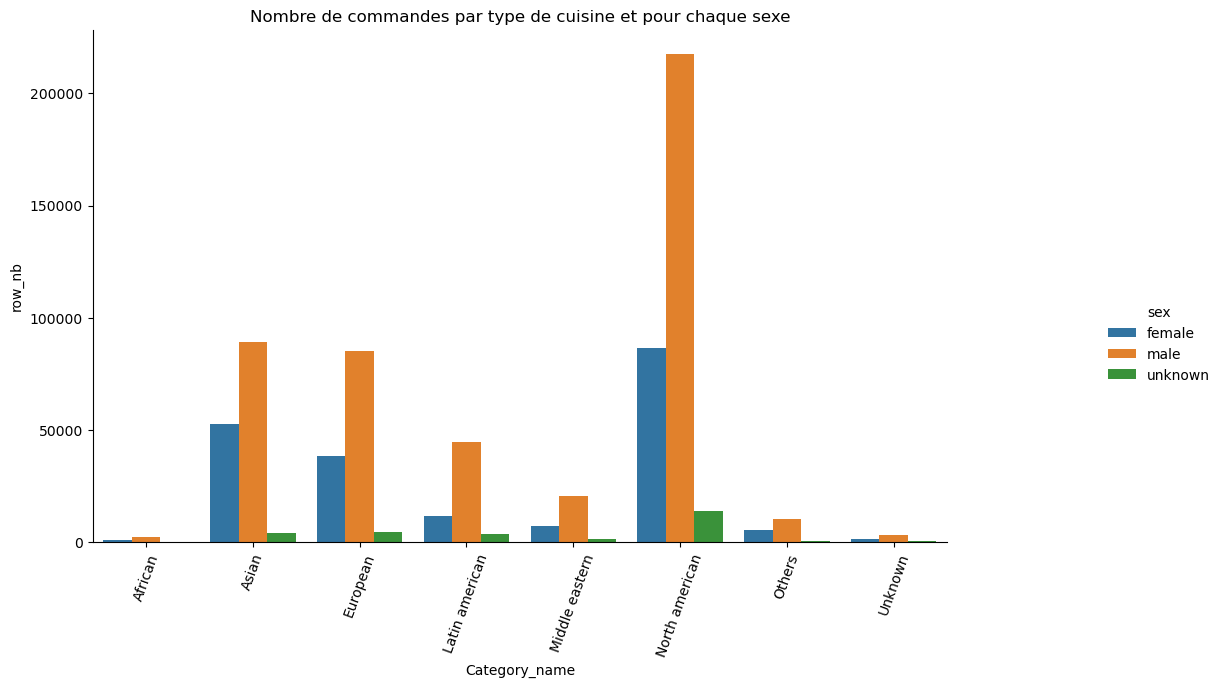

In [595]:
#nb de commandes par type de cuisine et pour chaque sexe
plt.figure(figsize=(10,8))
sns.catplot(data=nbcuisinesex, x='Category_name', y='row_nb', kind='bar', hue='sex')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Nombre de commandes par type de cuisine et pour chaque sexe')
plt.show()

In [596]:
#Nombre de commandes par moment de la journée et par catégorie de cuisine et sous catégorie de cuisine
tab_ub_del.groupby(['hour_range','Category_name','Sub_category_name'])['row_nb'].count().head(60)

hour_range  Category_name   Sub_category_name      
Afternoon   African         African                       414
            Asian           Asian - Others               1756
                            Chinese                      1295
                            Indian                       2245
                            Japanese                     7746
                            Korean                        511
                            Thai                         3043
                            Vietnamese                   2132
            European        British                        70
                            European - Others            1136
                            French                       4756
                            Italian                     10472
                            Salad                        1235
                            Spanish                        96
            Latin american  Latin american - Others       205
                  

In [597]:
#Nombre de commandes par jour de la semaine, moment de la journée et par age
tab_ub_del.groupby(['day_of_week','hour_range','age'])['row_nb'].count().sort_values(ascending=False)

day_of_week  hour_range  age                     
Sunday       Dinner      Gen. Y - [1980-1994]        35759
Friday       Dinner      Gen. Y - [1980-1994]        31656
Sunday       Dinner      Gen. Z - [1995-2010]        28333
Thursday     Dinner      Gen. Y - [1980-1994]        27155
Wednesday    Dinner      Gen. Y - [1980-1994]        26624
                                                     ...  
Thursday     Morning     Boomer - [1940-1959]            1
Monday       Night       Pre boomer - [1920-1939]        1
Sunday       Night       Pre boomer - [1920-1939]        1
Tuesday      Night       Pre boomer - [1920-1939]        1
Wednesday    Night       Pre boomer - [1920-1939]        1
Name: row_nb, Length: 202, dtype: int64

In [598]:
#Nombre de commandes par jour de la semaine, moment de la journée et par catégorie de cuisine
tab_ub_del.groupby(['day_of_week','hour_range','Category_name'])['row_nb'].count().sort_values(ascending=False).head(60)

day_of_week  hour_range  Category_name 
Sunday       Dinner      North american    30878
Friday       Dinner      North american    26775
Thursday     Dinner      North american    23571
Wednesday    Dinner      North american    23001
Saturday     Dinner      North american    22885
Tuesday      Dinner      North american    21306
Monday       Dinner      North american    19658
Sunday       Dinner      Asian             16827
Friday       Dinner      Asian             14304
Thursday     Dinner      Asian             12828
Sunday       Afternoon   North american    12540
Wednesday    Dinner      Asian             12471
Sunday       Dinner      European          12404
Saturday     Dinner      Asian             12335
Tuesday      Dinner      Asian             12276
Friday       Dinner      European          12269
Monday       Dinner      Asian             11482
Sunday       Lunch       North american    11252
Saturday     Lunch       North american    11215
Friday       Lunch       Nort

In [603]:
#Panier moyen par seller_category_name
tab_ub_del_ca.groupby('seller_category_name')['order_total_paid'].mean()

seller_category_name
Unknown                        23.887289
african                        23.674138
asian - chinese                26.168359
asian - indian                 27.615450
asian - japanese - others      27.423203
asian - japanese - sushi       29.706646
asian - korean                 25.646090
asian - others                 26.209532
asian - thai                   25.516248
asian - vietnamese             24.684099
european - british             22.648565
european - french              21.180870
european - italian - others    26.575431
european - italian - pasta     21.092980
european - italian - pizza     24.318650
european - others              21.859986
european - salad               21.030892
european - spanish             25.991703
latin american - mexican       18.891437
latin american - others        26.748749
latin american - peruvian      42.236957
middle eastern - kebab         17.507550
middle eastern - lebanese      25.136955
middle eastern - others        21.65

In [604]:
#CA selon la plateforme
tab_ub_del_ca.groupby('merchant_name')['order_total_paid'].sum().sort_values(ascending=False)

merchant_name
uber eats    10174299.4
deliveroo     6353471.5
Name: order_total_paid, dtype: float64

In [605]:
#CA par région
tab_ub_del_ca.groupby('order_item_delivery_address_region')['order_total_paid'].sum().round(2).sort_values(ascending=False)

order_item_delivery_address_region
ile de france                 8066905.3
auvergne rhone alpes          1953645.6
occitanie                     1209413.8
nouvelle aquitaine            1094713.1
provence alpes cote d azur     903719.6
hauts de france                778901.5
grand est                      697439.4
pays de la loire               636629.8
bretagne                       379213.9
normandie                      325707.0
centre val de loire            230523.8
bourgogne franche comte        150116.4
Unknown                         96991.8
reunion                          2435.3
corse                            1305.5
greater london                     54.9
canarias                           28.1
cataluna                           26.1
Name: order_total_paid, dtype: float64

In [606]:
#Nombre de commandes par région et plateforme
nbregionplat=tab_ub_del.groupby(['order_item_delivery_address_region', 'merchant_name'])['row_nb'].count().to_frame()
nbregionplat = nbregionplat.reset_index()
nbregionplat

,order_item_delivery_address_region,merchant_name,row_nb
0,Unknown,deliveroo,3334
1,Unknown,uber eats,343
2,auvergne rhone alpes,deliveroo,28291
3,auvergne rhone alpes,uber eats,57507
4,bourgogne franche comte,deliveroo,2405
5,bourgogne franche comte,uber eats,4469
6,bretagne,deliveroo,5107
7,bretagne,uber eats,11778
8,canarias,uber eats,1
9,cataluna,uber eats,1


<Figure size 1000x800 with 0 Axes>

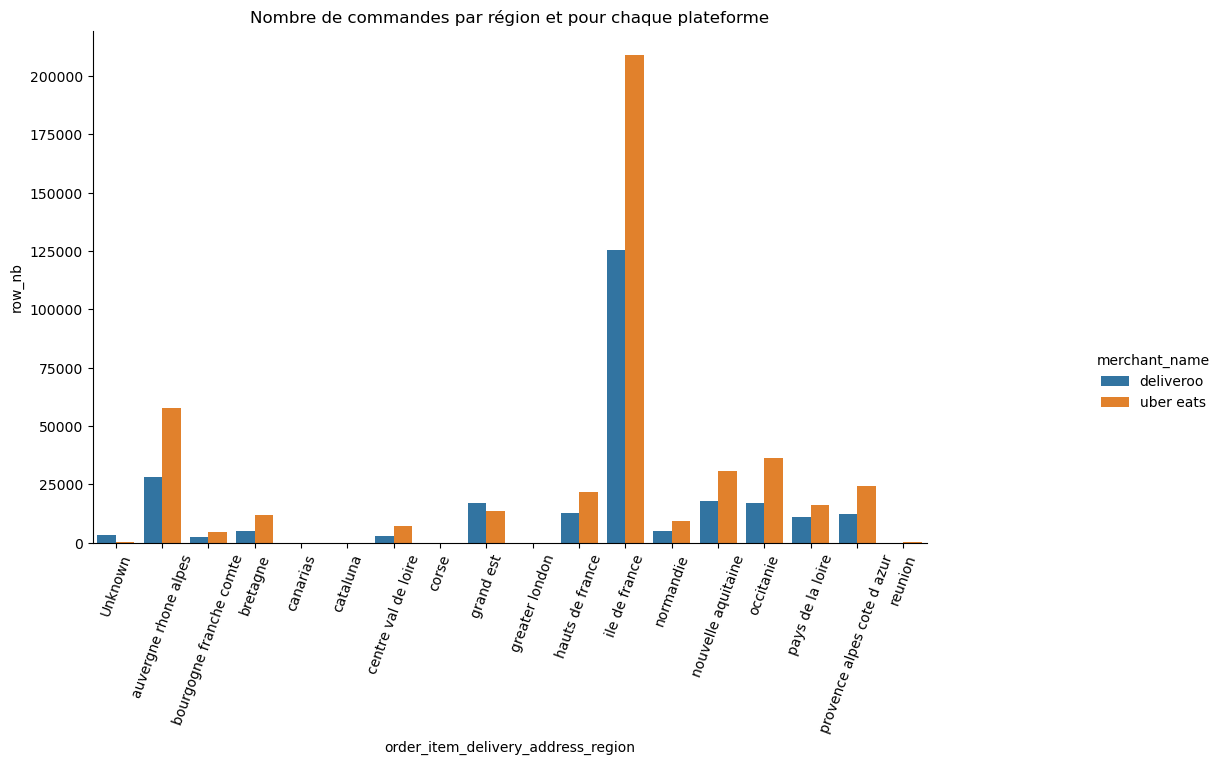

In [607]:
#nb de commandes par region et pour chaque plateforme
plt.figure(figsize=(10,8))
sns.catplot(data=nbregionplat, x='order_item_delivery_address_region', y='row_nb', kind='bar', hue='merchant_name')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Nombre de commandes par région et pour chaque plateforme')
plt.show()

In [608]:
#Panier moyen par région et plateforme
t9=tab_ub_del_ca.groupby(['order_item_delivery_address_region', 'merchant_name'])['order_total_paid'].mean().to_frame()
t9 = t9.reset_index()
t9

,order_item_delivery_address_region,merchant_name,order_total_paid
0,Unknown,deliveroo,26.967227
1,Unknown,uber eats,21.229118
2,auvergne rhone alpes,deliveroo,23.077311
3,auvergne rhone alpes,uber eats,22.642453
4,bourgogne franche comte,deliveroo,21.644917
5,bourgogne franche comte,uber eats,21.981326
6,bretagne,deliveroo,23.208743
7,bretagne,uber eats,22.152718
8,canarias,uber eats,28.100000
9,cataluna,uber eats,26.100000


<Figure size 1000x800 with 0 Axes>

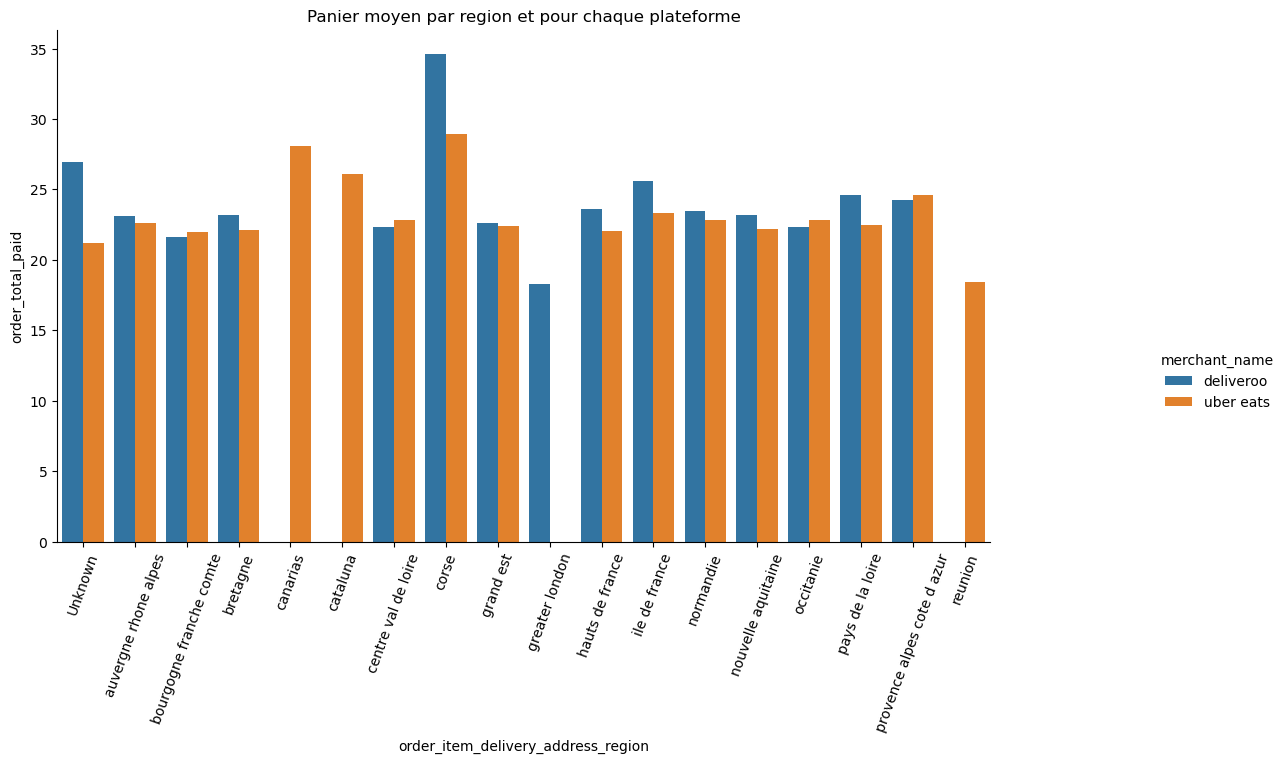

In [609]:
#Panier moyen par region et pour chaque plateforme
plt.figure(figsize=(10,8))
sns.catplot(data=t9, x='order_item_delivery_address_region', y='order_total_paid', kind='bar', hue='merchant_name')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Panier moyen par region et pour chaque plateforme')
plt.show()

In [610]:
#CA par région et par période
tab_ub_del_ca.groupby(['periode','order_item_delivery_address_region'])['order_total_paid'].sum().round(0).to_frame()

order_total_paid
periode order_item_delivery_address_region                  
2017-01 Unknown                                        260.0
        auvergne rhone alpes                         10126.0
        bretagne                                      1490.0
        grand est                                     1567.0
        hauts de france                               3400.0
...                                                      ...
2020-06 nouvelle aquitaine                           72969.0
        occitanie                                    80548.0
        pays de la loire                             42586.0
        provence alpes cote d azur                   62652.0
        reunion                                        334.0

[557 rows x 1 columns]

In [611]:
#CA par type de cuisine
tab_ub_del_ca.groupby('Category_name')['order_total_paid'].sum().sort_values(ascending=False).round(0)

Category_name
North american    7281158.0
Asian             3984276.0
European          3008823.0
Latin american    1131432.0
Middle eastern     589876.0
Others             337256.0
Unknown            115949.0
African             79001.0
Name: order_total_paid, dtype: float64

In [612]:
#Panier moyen par catégorie de cuisine et plateforme
t10=tab_ub_del_ca.groupby(['Category_name', 'merchant_name'])['order_total_paid'].mean().to_frame()
t10 = t10.reset_index()
t10

,Category_name,merchant_name,order_total_paid
0,African,deliveroo,24.600460
1,African,uber eats,23.079980
2,Asian,deliveroo,28.089130
3,Asian,uber eats,26.671566
4,European,deliveroo,24.360627
5,European,uber eats,22.867117
6,Latin american,deliveroo,19.476390
7,Latin american,uber eats,18.964536
8,Middle eastern,deliveroo,22.008268
9,Middle eastern,uber eats,19.723974


<Figure size 1000x800 with 0 Axes>

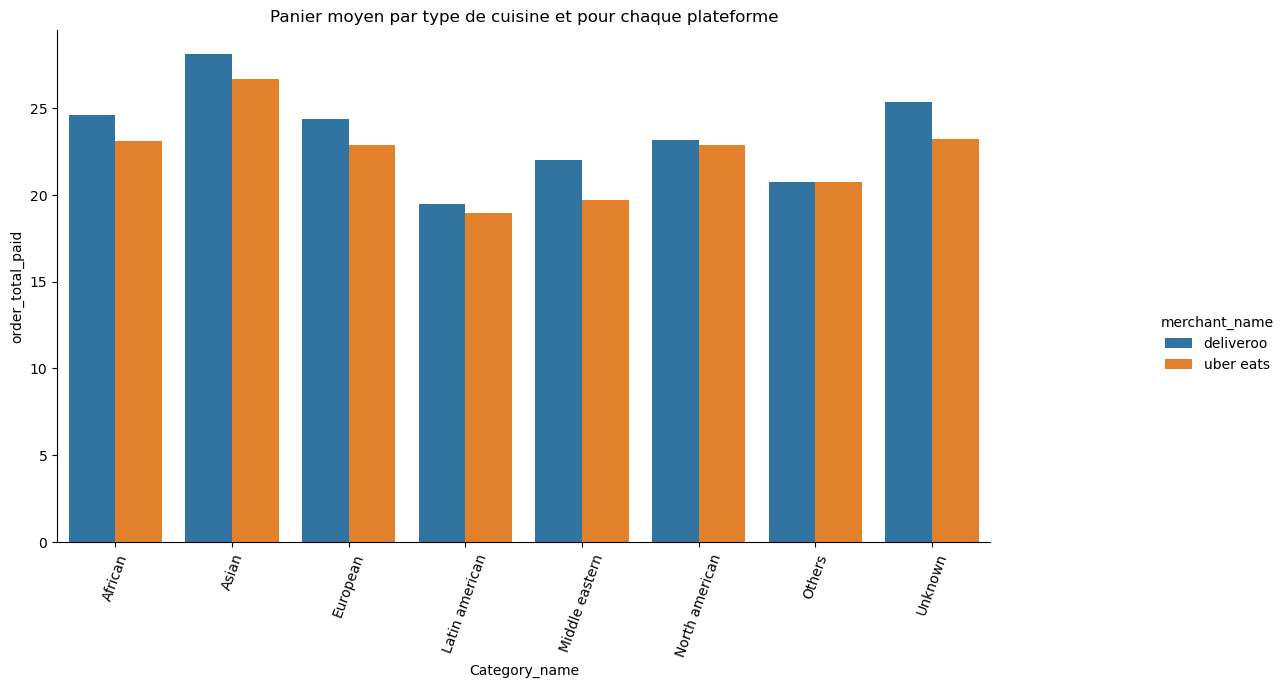

In [613]:
#Panier moyen par type de cuisine et pour chaque plateforme
plt.figure(figsize=(10,8))
sns.catplot(data=t10, x='Category_name', y='order_total_paid', kind='bar', hue='merchant_name')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Panier moyen par type de cuisine et pour chaque plateforme')
plt.show()

In [614]:
#Panier moyen par catégorie de cuisine et sexe
t11=tab_ub_del_ca.groupby(['Category_name', 'sex'])['order_total_paid'].mean().to_frame()
t11 = t11.reset_index()
t11

,Category_name,sex,order_total_paid
0,African,female,24.378564
1,African,male,23.381831
2,African,unknown,23.138217
3,Asian,female,27.294173
4,Asian,male,27.446622
5,Asian,unknown,25.368786
6,European,female,24.056901
7,European,male,23.406764
8,European,unknown,22.256560
9,Latin american,female,19.999806


c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

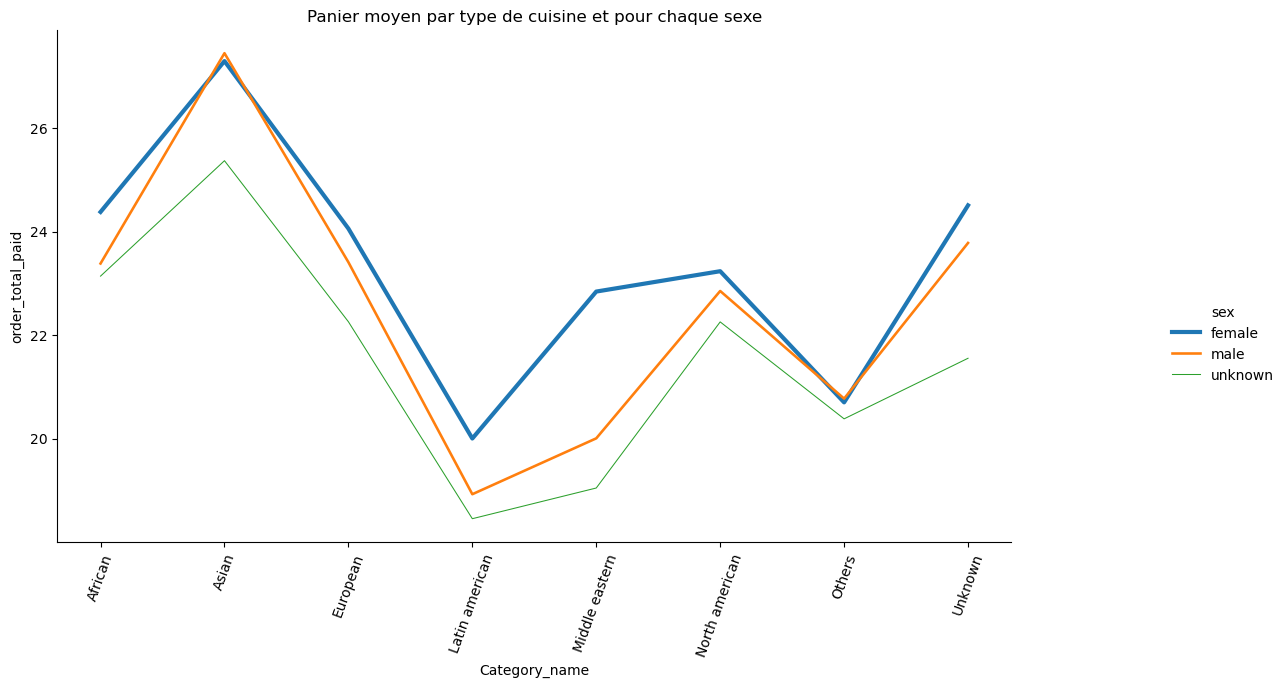

In [615]:
#Panier moyen par type de cuisine et pour chaque sexe
plt.figure(figsize=(10,8))
sns.relplot(data=t11, x='Category_name', y='order_total_paid', kind='line', hue='sex',size='sex')
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Panier moyen par type de cuisine et pour chaque sexe')
plt.show()

In [616]:
#montant moyen de la commande par sous categorie de restau
t17=tab_ub_del_ca.groupby(['Sub_category_name'])['order_total_paid'].mean().to_frame()
t17 = t17.sort_values(by='order_total_paid', ascending=False).reset_index()
t17

,Sub_category_name,order_total_paid
0,Peruvian,42.236957
1,Japanese,29.118700
2,Indian,27.615450
3,Latin american - Others,26.748749
4,Asian - Others,26.209532
5,Chinese,26.168359
6,Spanish,25.991703
7,Korean,25.646090
8,Thai,25.516248
9,Lebanese,25.136955


In [617]:
#Nombre de commande par sous categorie de restau
t18=tab_ub_del.groupby(['Sub_category_name'])['row_nb'].count().to_frame()
t18 = t18.sort_values(by='row_nb', ascending=False).reset_index()
t18

,Sub_category_name,row_nb
0,Burger,210160
1,Italian,83280
2,Japanese,61677
3,Mexican,57854
4,Chicken,33478
5,Sandwich,29566
6,French,28535
7,Thai,24077
8,Indian,18757
9,North american - Others,18679


In [618]:
#Panier moyen de la commande par categorie et sous categorie de restau
t19=tab_ub_del_ca.groupby(['Category_name','Sub_category_name'])['order_total_paid'].mean().to_frame()
t19 = t19.sort_values(by='order_total_paid', ascending=False).reset_index()
t19

,Category_name,Sub_category_name,order_total_paid
0,Latin american,Peruvian,42.236957
1,Asian,Japanese,29.118700
2,Asian,Indian,27.615450
3,Latin american,Latin american - Others,26.748749
4,Asian,Asian - Others,26.209532
5,Asian,Chinese,26.168359
6,European,Spanish,25.991703
7,Asian,Korean,25.646090
8,Asian,Thai,25.516248
9,Middle eastern,Lebanese,25.136955


In [619]:
#Nombre de commande par categorie de restau et sous categorie de restau
t20=tab_ub_del.groupby(['Category_name','Sub_category_name'])['row_nb'].count().to_frame()
t20 = t20.sort_values(by='row_nb', ascending=False).reset_index()
t20

,Category_name,Sub_category_name,row_nb
0,North american,Burger,210160
1,European,Italian,83280
2,Asian,Japanese,61677
3,Latin american,Mexican,57854
4,North american,Chicken,33478
5,North american,Sandwich,29566
6,European,French,28535
7,Asian,Thai,24077
8,Asian,Indian,18757
9,North american,North american - Others,18679


In [620]:
#Montant total des promos par plateforme de livraison
tab_ub_del_ca.groupby('merchant_name')['order_total_promo'].sum()

merchant_name
deliveroo    204688.2
uber eats    423963.3
Name: order_total_promo, dtype: float64

In [621]:
#Montant des commandes sans promo
paid_nopromo=tab_ub_del_ca[tab_ub_del_ca['promo_yes']=='no_promo']
paid_nopromo2=paid_nopromo['order_total_paid']
paid_nopromo2

2         10.6
5         24.0
7         13.7
8         14.5
12        13.3
          ... 
807658    24.4
807661    18.5
807664    35.2
807667    13.6
807670    24.5
Name: order_total_paid, Length: 611578, dtype: float64

In [622]:
#Montant des commandes avec promo
paid_promo=tab_ub_del_ca[tab_ub_del_ca['promo_yes']=='promo applied']
paid_promo2=paid_promo['order_total_paid']
paid_promo2

1          7.6
29         5.3
31        25.9
36        18.0
51        13.9
          ... 
807563    18.8
807570    13.6
807575    23.7
807609    23.3
807642    14.5
Name: order_total_paid, Length: 91658, dtype: float64

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


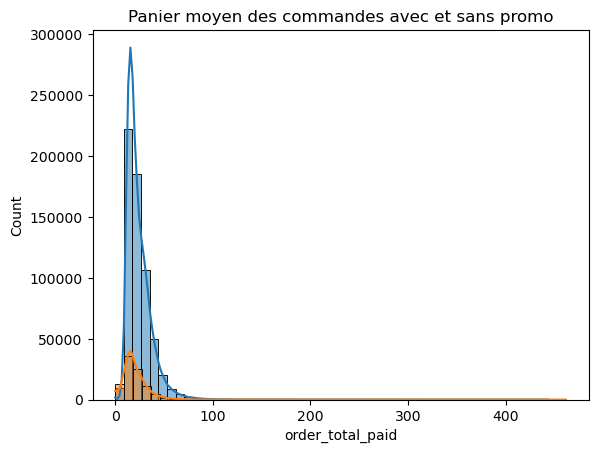

In [623]:
#Panier moyen des commandes avec et sans promo
ax=sns.histplot(paid_nopromo2, bins=50, kde=True)
ax=sns.histplot(paid_promo2, bins=50, kde=True, ax=ax)
#plt.gcf().set_size_inches(14,6)
#plt.xticks(rotation=70)
plt.title('Panier moyen des commandes avec et sans promo')
plt.show()

In [624]:
#par plateforme, avec et sans promo, CA total, nb de commandes, panier moyen
print(tab_ub_del_ca.groupby(['merchant_name','promo_yes'])['order_total_paid'].sum(), 
      tab_ub_del_ca.groupby(['merchant_name','promo_yes'])['order_total_paid'].count(),
      tab_ub_del_ca.groupby(['merchant_name','promo_yes'])['order_total_paid'].mean()
     )

merchant_name  promo_yes    
deliveroo      no_promo         5619609.6
               promo applied     733861.9
uber eats      no_promo         9062731.8
               promo applied    1111567.6
Name: order_total_paid, dtype: float64 merchant_name  promo_yes    
deliveroo      no_promo         225416
               promo applied     35101
uber eats      no_promo         386162
               promo applied     56557
Name: order_total_paid, dtype: int64 merchant_name  promo_yes    
deliveroo      no_promo         24.929950
               promo applied    20.907151
uber eats      no_promo         23.468730
               promo applied    19.653935
Name: order_total_paid, dtype: float64


In [625]:
#par type de cuisine, avec et sans promo, nb de commandes, panier moyen
print( 
      tab_ub_del_ca.groupby(['promo_yes','Category_name'])['order_total_paid'].count(),
      tab_ub_del_ca.groupby(['promo_yes','Category_name'])['order_total_paid'].mean()
     )

promo_yes      Category_name 
no_promo       African             2937
               Asian             123736
               European          110050
               Latin american     50606
               Middle eastern     24774
               North american    281362
               Others             14269
               Unknown             3844
promo applied  African              400
               Asian              22033
               European           17634
               Latin american      8623
               Middle eastern      3778
               North american     36183
               Others              1997
               Unknown             1010
Name: order_total_paid, dtype: int64 promo_yes      Category_name 
no_promo       African           24.205754
               Asian             28.034255
               European          24.125553
               Latin american    19.526412
               Middle eastern    21.069860
               North american    23.394612
     

In [626]:
#somme des total fees par plateforme
tab_ub_del_ca.groupby('merchant_name')['order_total_fees'].sum()

merchant_name
deliveroo     589911.8
uber eats    1949037.4
Name: order_total_fees, dtype: float64

In [627]:
tab_ub_del_ca

,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,day_of_week,order_delivery_fee_i,provider,agenum
1,2,1,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male,Asian,Indian,Dinner,promo applied,Other region,Thursday,2.5,1,3
2,3,1,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male,Latin american,Mexican,Lunch,no_promo,Other region,Wednesday,3.0,1,3
5,6,1,Gen. Z - [1995-2010],uber eats,2018-09-06,22,24.0,payment card - visa,2.5,0.0,2.5,0.0,pizzou,european - italian - pizza,ile de france,paris,paris,1,0,0,2018-09,male,European,Italian,Dinner,no_promo,Ile de France - Paris,Thursday,2.5,1,3
7,8,1,Gen. Y - [1980-1994],uber eats,2018-12-04,21,13.7,payment card - visa,2.5,0.0,2.5,0.0,subway,north american - sandwich,nouvelle aquitaine,gironde,bordeaux,1,0,0,2018-12,male,North american,Sandwich,Dinner,no_promo,Other region,Tuesday,2.5,1,2
8,9,2,Gen. Z - [1995-2010],uber eats,2019-11-28,21,14.5,payment card - visa,3.5,0.0,3.5,0.0,sushi m,asian - japanese - sushi,ile de france,paris,paris,1,0,0,2019-11,female,Asian,Japanese,Dinner,no_promo,Ile de France - Paris,Thursday,3.5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807658,807659,1,Gen. Z - [1995-2010],deliveroo,2020-03-12,20,24.4,Unknown,3.5,0.0,3.5,0.0,burger king,north american - burger,nouvelle aquitaine,vienne,poitiers,1,0,1,2020-03,male,North american,Burger,Dinner,no_promo,Other region,Thursday,3.5,0,3
807661,807662,1,Gen. Y - [1980-1994],deliveroo,2018-10-09,10,18.5,Unknown,0.0,0.0,0.0,0.0,massa,middle eastern - lebanese,nouvelle aquitaine,gironde,bordeaux,0,0,1,2018-10,male,Middle eastern,Lebanese,Morning,no_promo,Other region,Tuesday,0.0,0,2
807664,807665,1,Gen. X - [1960-1979],deliveroo,2018-12-18,21,35.2,Unknown,2.5,0.0,2.5,0.0,burger king,north american - burger,ile de france,paris,paris,0,0,1,2018-12,male,North american,Burger,Dinner,no_promo,Ile de France - Paris,Tuesday,2.5,0,1
807667,807668,2,Unknown,deliveroo,2019-01-28,19,13.6,Unknown,2.4,0.0,2.4,0.0,pierre sang,asian - korean,ile de france,paris,paris,0,0,1,2019-01,female,Asian,Korean,Dinner,no_promo,Ile de France - Paris,Monday,2.4,0,5


In [628]:
#preparation table pour voir la correlation sur la table tab_ub_del_ca
tab_ub_del_ca['provider']=tab_ub_del_ca['merchant_name'].astype('category').cat.codes
tab_ub_del_ca['agenum']=tab_ub_del_ca['age'].astype('category').cat.codes
transactions4=tab_ub_del_ca.select_dtypes(include='number')
transactions4=transactions4[['provider','agenum', 'gender','order_time', 'order_total_paid', 'order_total_fees', 'order_delivery_fee','order_total_promo','order_processing_fee','is_customer_month_ubereats','is_customer_month_justeat', 'is_customer_month_deliveroo']]
transactions4.corr()

,provider,agenum,gender,order_time,order_total_paid,order_total_fees,order_delivery_fee,order_total_promo,order_processing_fee,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo
provider,1.000000,0.099112,0.003750,-0.052898,-0.053294,0.395916,0.235559,0.028475,0.221998,0.821685,0.031000,-0.828658
agenum,0.099112,1.000000,0.042550,-0.023797,-0.091441,0.036433,0.020537,0.025227,0.032374,0.098269,0.003043,-0.096471
gender,0.003750,0.042550,1.000000,0.002104,0.012364,-0.000478,0.026194,0.018043,0.018423,-0.017832,-0.053978,-0.023122
order_time,-0.052898,-0.023797,0.002104,1.000000,0.095413,0.000798,-0.009965,0.027605,0.013984,-0.051102,-0.009569,0.036503
order_total_paid,-0.053294,-0.091441,0.012364,0.095413,1.000000,0.198444,0.110657,-0.108333,0.126697,-0.065450,0.004829,0.045290
order_total_fees,0.395916,0.036433,-0.000478,0.000798,0.198444,1.000000,0.429030,0.040136,0.220904,0.321148,0.019655,-0.331144
order_delivery_fee,0.235559,0.020537,0.026194,-0.009965,0.110657,0.429030,1.000000,-0.036997,-0.226501,0.184001,0.015068,-0.194016
order_total_promo,0.028475,0.025227,0.018043,0.027605,-0.108333,0.040136,-0.036997,1.000000,0.165397,0.027385,-0.011288,-0.039534
order_processing_fee,0.221998,0.032374,0.018423,0.013984,0.126697,0.220904,-0.226501,0.165397,1.000000,0.182889,-0.019065,-0.191985
is_customer_month_ubereats,0.821685,0.098269,-0.017832,-0.051102,-0.065450,0.321148,0.184001,0.027385,0.182889,1.000000,0.034506,-0.680896


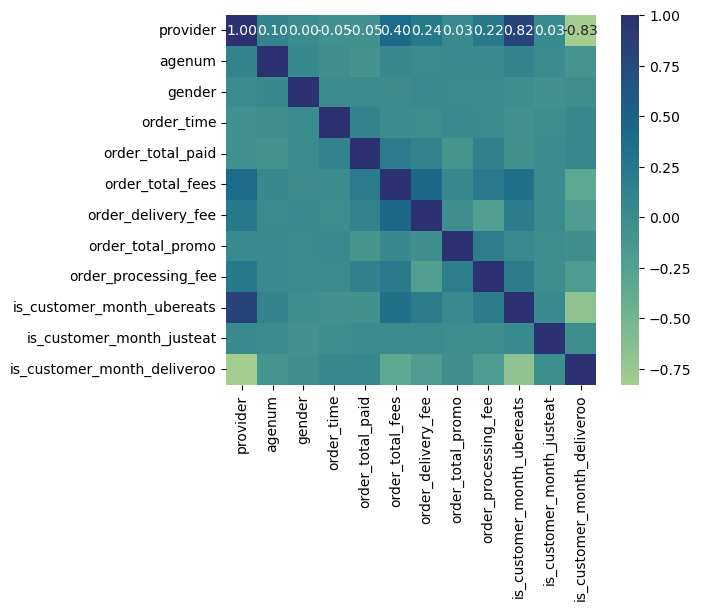

In [629]:
#matrice de correlation pour la table tab_ub_del_ca
sns.heatmap(transactions4.corr(), square=True, annot=True, cmap='crest',fmt='.2f')
plt.show()

In [630]:
# CA par heure
total_per_hour=tab_ub_del_ca.groupby('order_time')['order_total_paid'].sum().astype('int64')
total_per_hour.reset_index()

,order_time,order_total_paid
0,0,514313
1,1,223634
2,2,108622
3,3,61134
4,4,33646
5,5,21112
6,6,12219
7,7,8839
8,8,11980
9,9,28007


In [631]:
# CA selon heure/merchant
tab_hours_merch=tab_ub_del_ca.groupby(['hour_range','merchant_name'])['order_total_paid'].sum().reset_index()
tab_hours_merch

,hour_range,merchant_name,order_total_paid
0,Afternoon,deliveroo,983587.6
1,Afternoon,uber eats,1491675.5
2,Dinner,deliveroo,3829923.4
3,Dinner,uber eats,5946218.3
4,Lunch,deliveroo,1282824.1
5,Lunch,uber eats,1832605.1
6,Morning,deliveroo,110272.6
7,Morning,uber eats,75982.0
8,Night,deliveroo,146863.8
9,Night,uber eats,827818.5


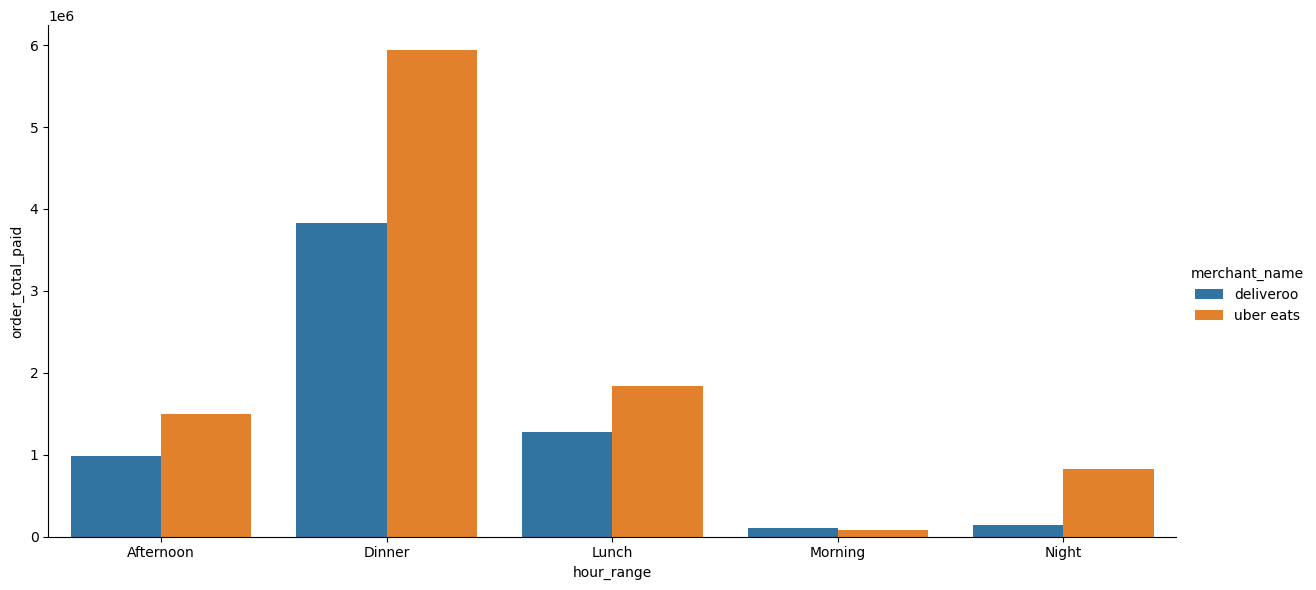

In [632]:
#Graph montrant CA par moment de la journée et par plateforme
sns.catplot(data=tab_hours_merch,x='hour_range', y='order_total_paid', kind='bar', hue='merchant_name', height=6, aspect=2)
plt.show()

In [633]:
#fonction qui indique la fidélité dans le mois aux 2 plateformes
def fidelite(row):
    if row['is_customer_month_ubereats'] == 1 and row['is_customer_month_deliveroo'] == 1:
        return 'Client uber et deliveroo'
    if row['is_customer_month_ubereats'] == 1 and row['is_customer_month_deliveroo'] == 0:
        return 'Client uber'
    if row['is_customer_month_ubereats'] == 0 and row['is_customer_month_deliveroo'] == 1:
        return 'Client deliveroo'

In [634]:
#Création d'une nouvelle variable fidelite qui permet de connaitre la fidelité d'un client 
tab_ub_del['fidelite']= tab_ub_del.apply(fidelite, axis=1)

In [635]:
#check répartition variable fidelite
tab_ub_del['fidelite'].value_counts()

fidelite
Client uber                 378770
Client deliveroo            200304
Client uber et deliveroo    124687
Name: count, dtype: int64

In [636]:
#répartition variable fidelite par période
tf=tab_ub_del.groupby('periode')['fidelite'].value_counts().to_frame()
tf = tf.reset_index()
tf

,periode,fidelite,count
0,2017-01,Client deliveroo,2232
1,2017-01,Client uber,1030
2,2017-01,Client uber et deliveroo,485
3,2017-02,Client deliveroo,2293
4,2017-02,Client uber,965
...,...,...,...
121,2020-05,Client deliveroo,8662
122,2020-05,Client uber et deliveroo,8213
123,2020-06,Client uber,28519
124,2020-06,Client deliveroo,8735


In [637]:
tf['periode'] = tf['periode'].astype(str)

c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nadeg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


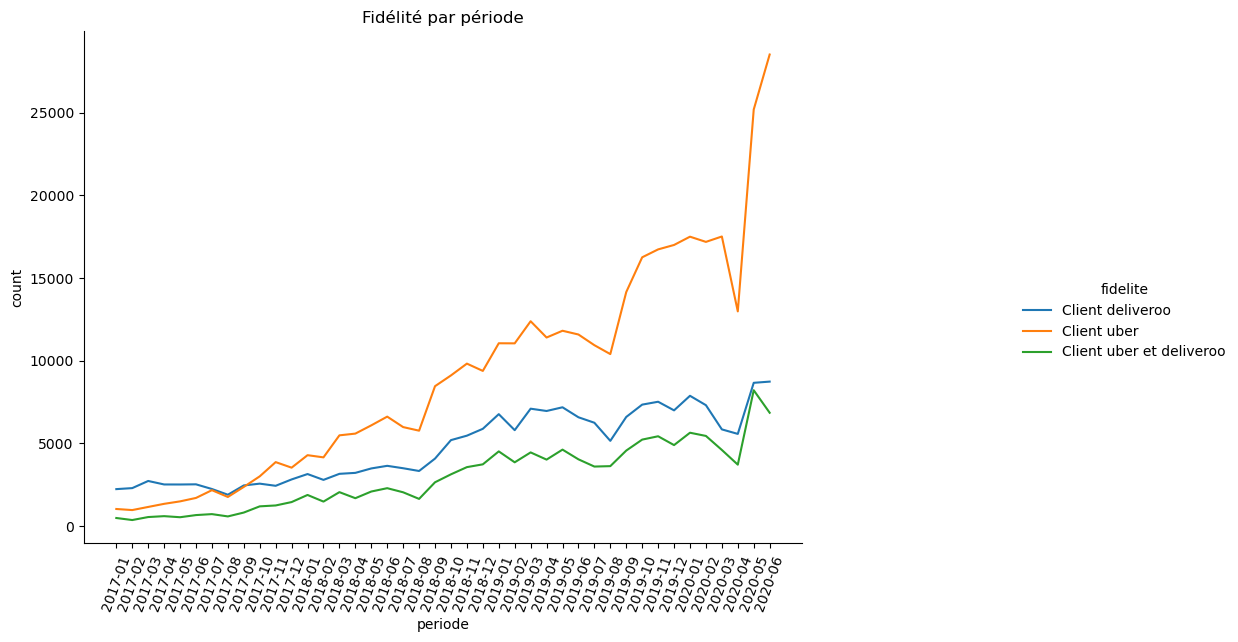

In [638]:
#Fidélité par periode
sns.relplot(data=tf, x='periode', y='count', kind='line', hue='fidelite' )
plt.gcf().set_size_inches(14,6)
plt.xticks(rotation=70)
plt.title('Fidélité par période')
plt.show()

In [639]:
#customers.to_csv('customers.csv', index=False)
#FileLink('customers.csv')

In [640]:
#product2.to_csv('product2.csv', index=False)
#FileLink('product2.csv')

In [641]:
#transactions2.to_csv('transactions2.csv', index=False)
#FileLink('transactions2.csv')

In [642]:
#tab_ub_del.to_csv('tab_ub_del.csv', index=False)
#FileLink('tab_ub_del.csv')

In [643]:
#tab_ub_del_ca.to_csv('tab_ub_del_ca.csv', index=False)
#FileLink('tab_ub_del_ca.csv')